image and landmarks added
[WARNING] Landmarks file not found for dataset_not_for_upload_images\Abbas\Abbas_39.jpg
[WARNING] Landmarks file not found for dataset_not_for_upload_images\Abbas\Abbas_81.jpg
[WARNING] Landmarks file not found for dataset_not_for_upload_images\Abbas\Abbas_102.jpg
[WARNING] Landmarks file not found for dataset_not_for_upload_images\Abbas\Abbas_99.jpg
[WARNING] Landmarks file not found for dataset_not_for_upload_images\Abbas\Abbas_56.jpg


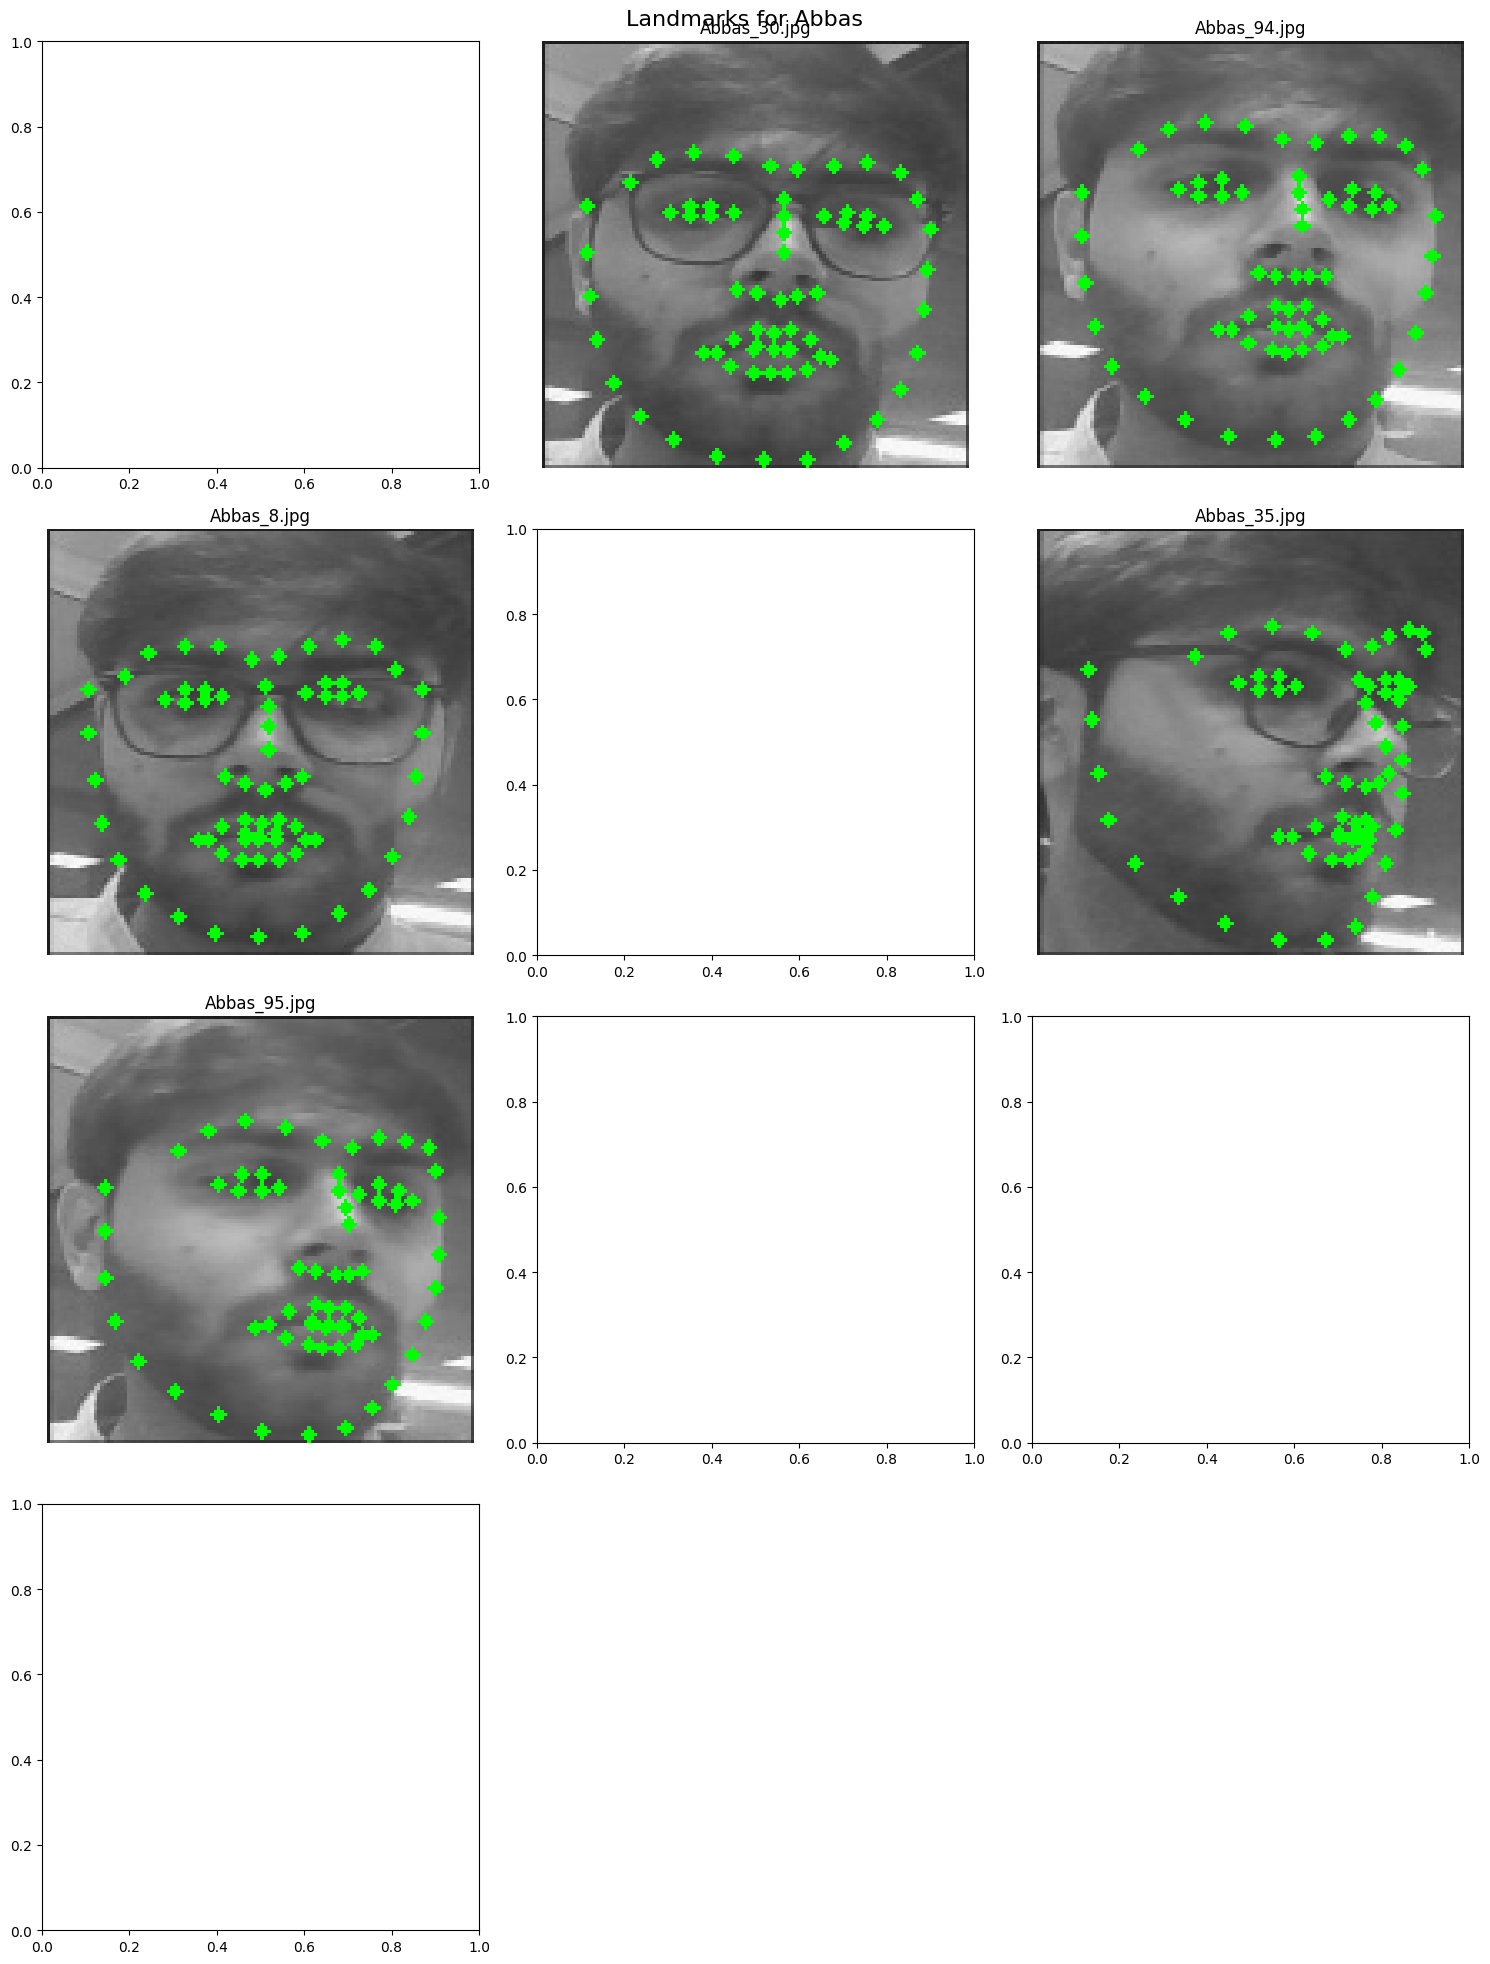

[WARNING] Landmarks file not found for dataset_not_for_upload_images\abdullah\abdullah_9.jpg


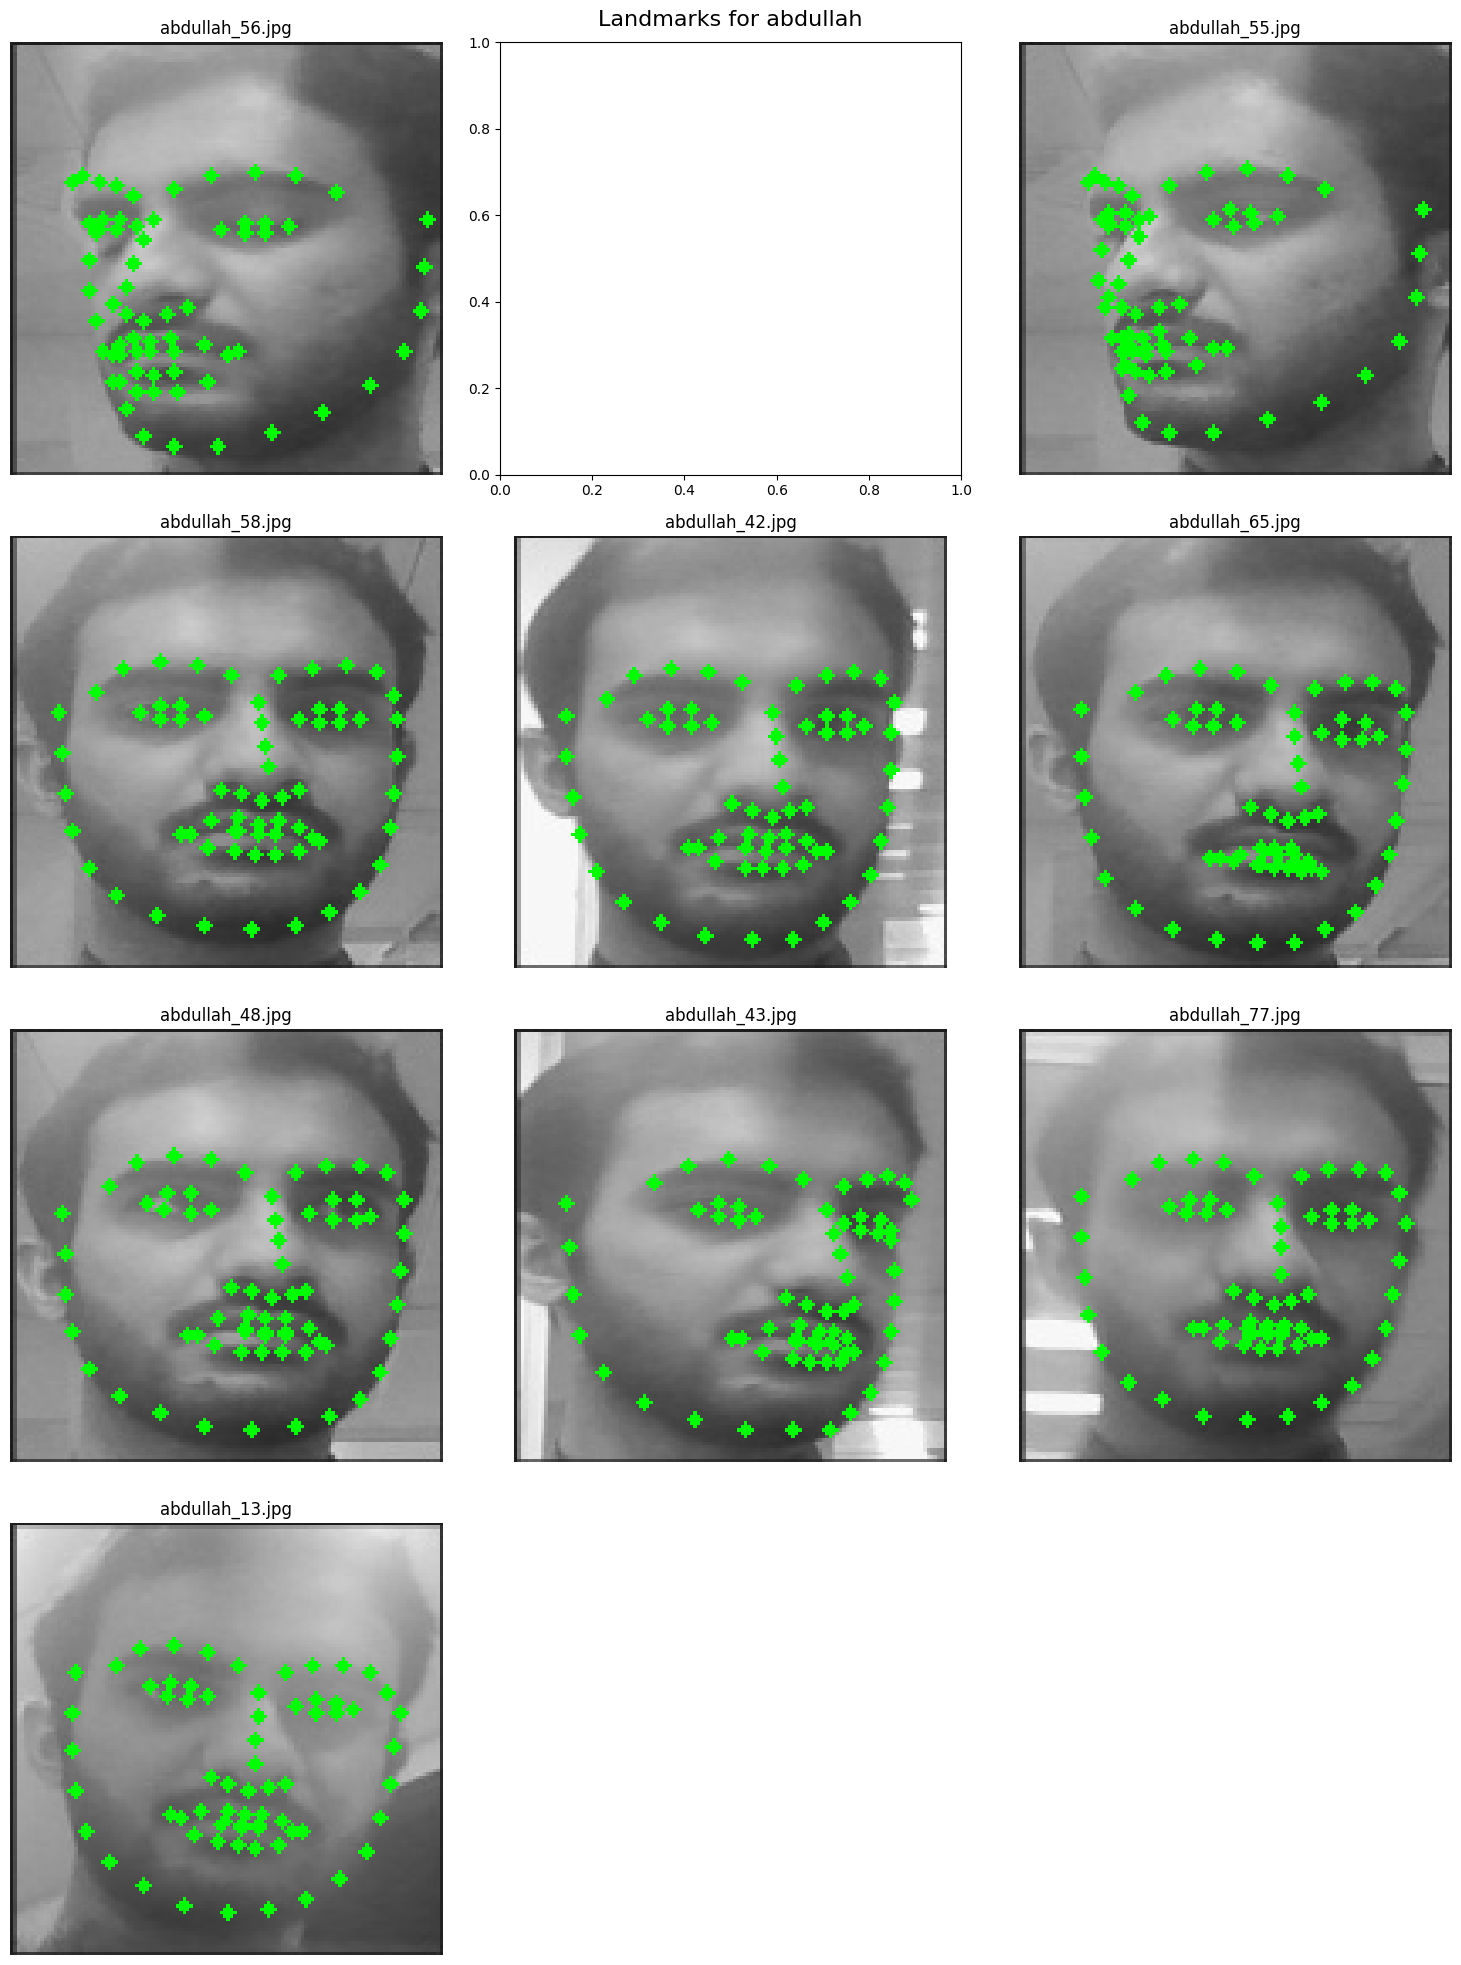

[WARNING] Landmarks file not found for dataset_not_for_upload_images\adil\adil_35.jpg
[WARNING] Landmarks file not found for dataset_not_for_upload_images\adil\adil_34.jpg
[WARNING] Landmarks file not found for dataset_not_for_upload_images\adil\adil_39.jpg


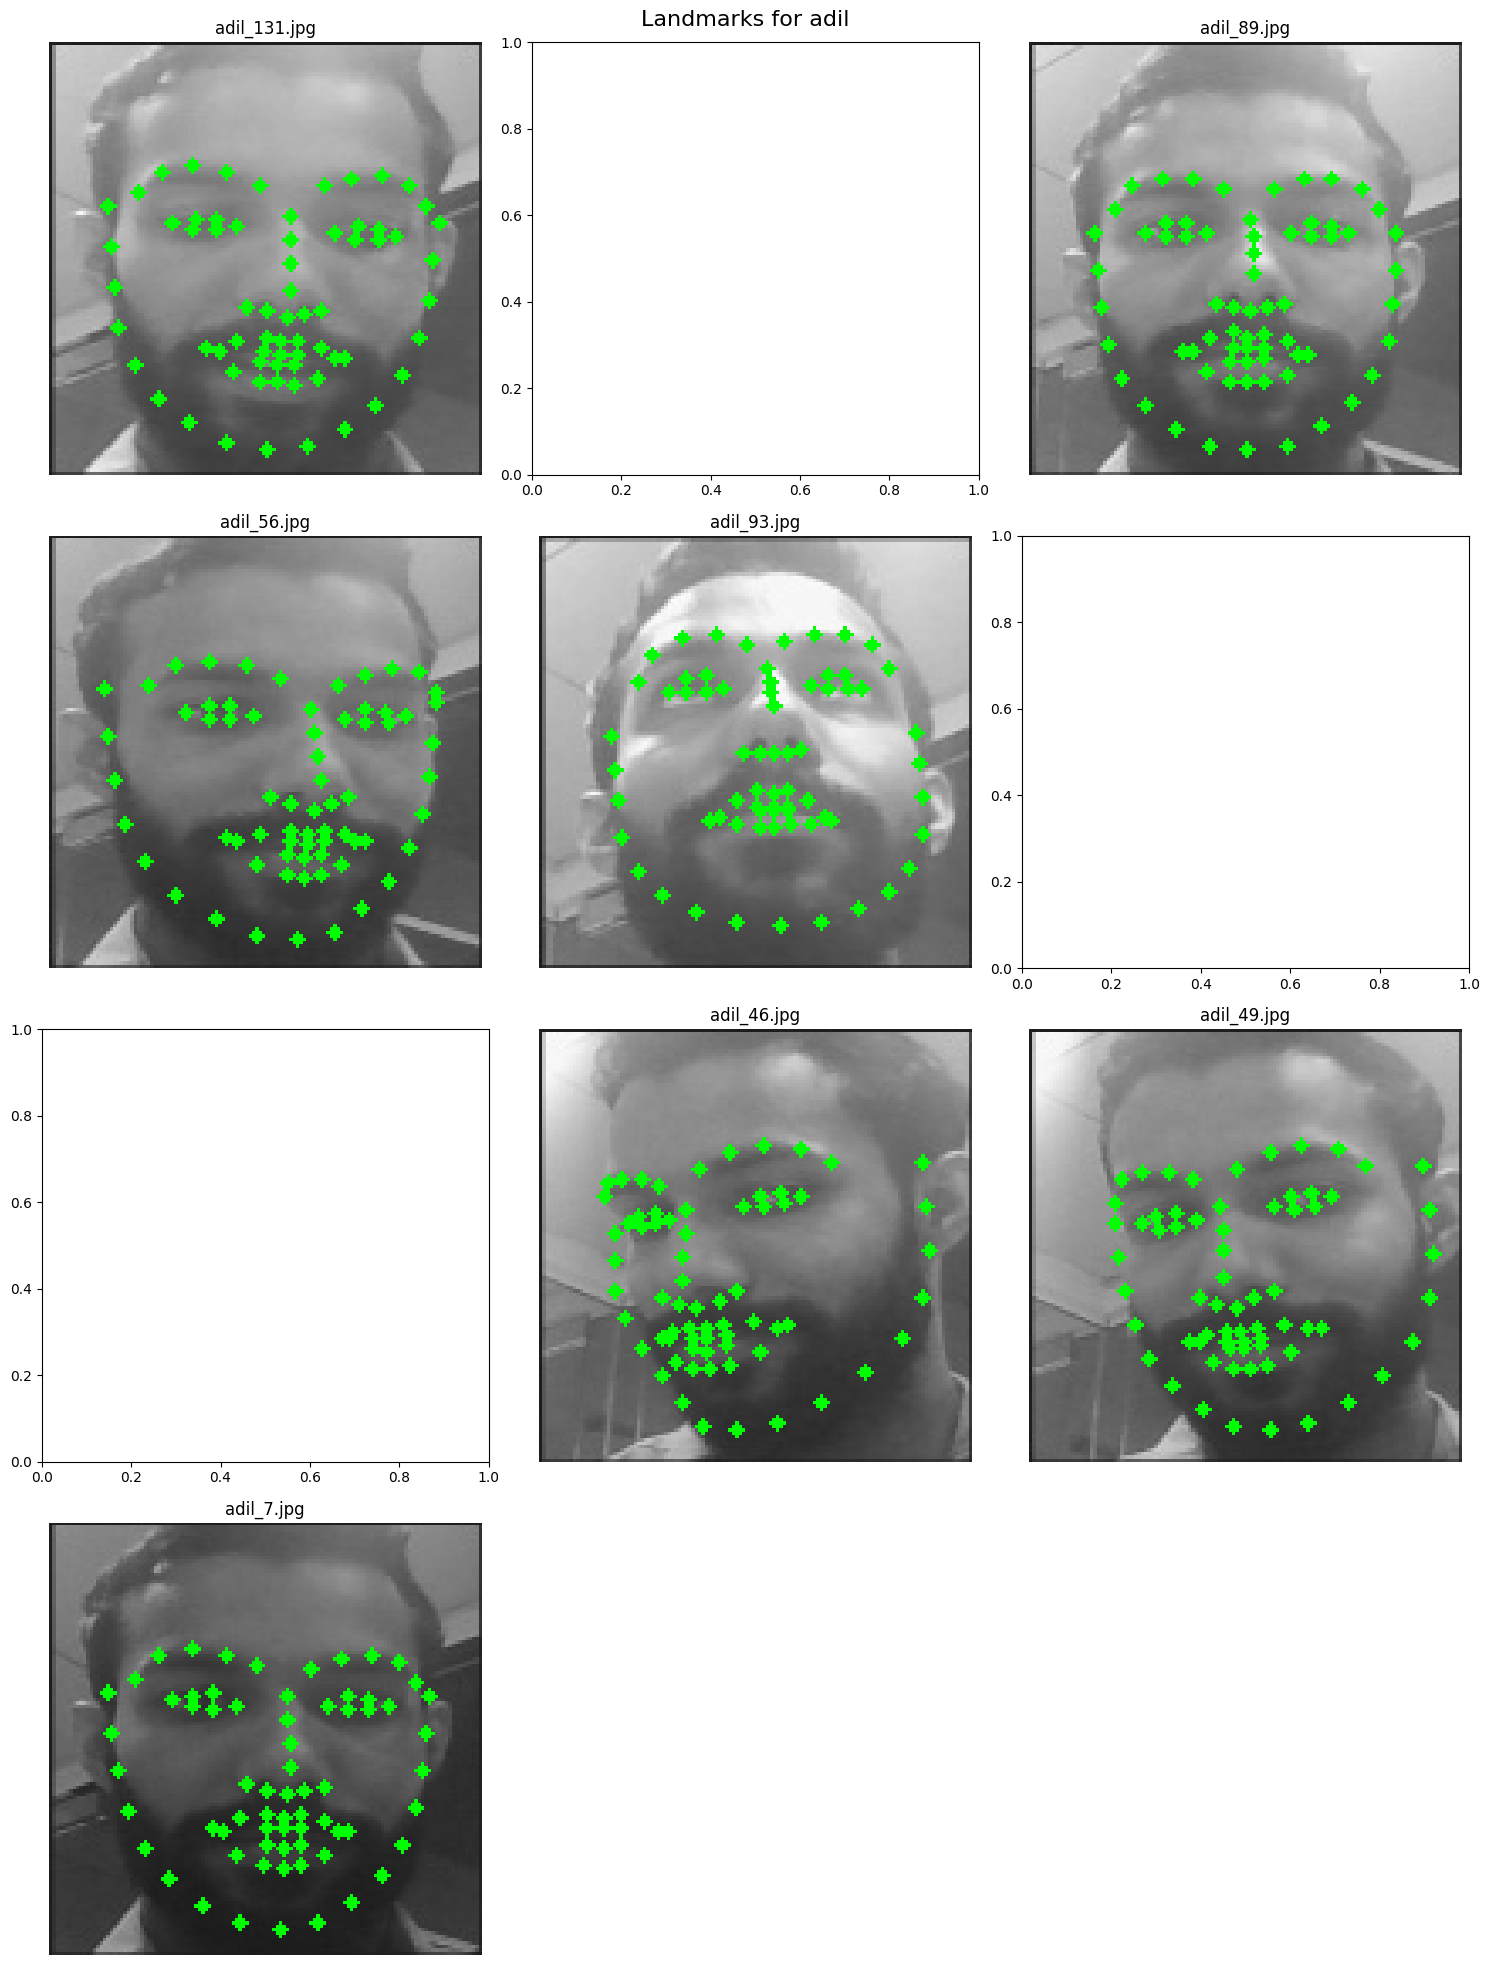

[WARNING] Landmarks file not found for dataset_not_for_upload_images\Ali amaan\Ali amaan_46.jpg
[WARNING] Landmarks file not found for dataset_not_for_upload_images\Ali amaan\Ali amaan_89.jpg


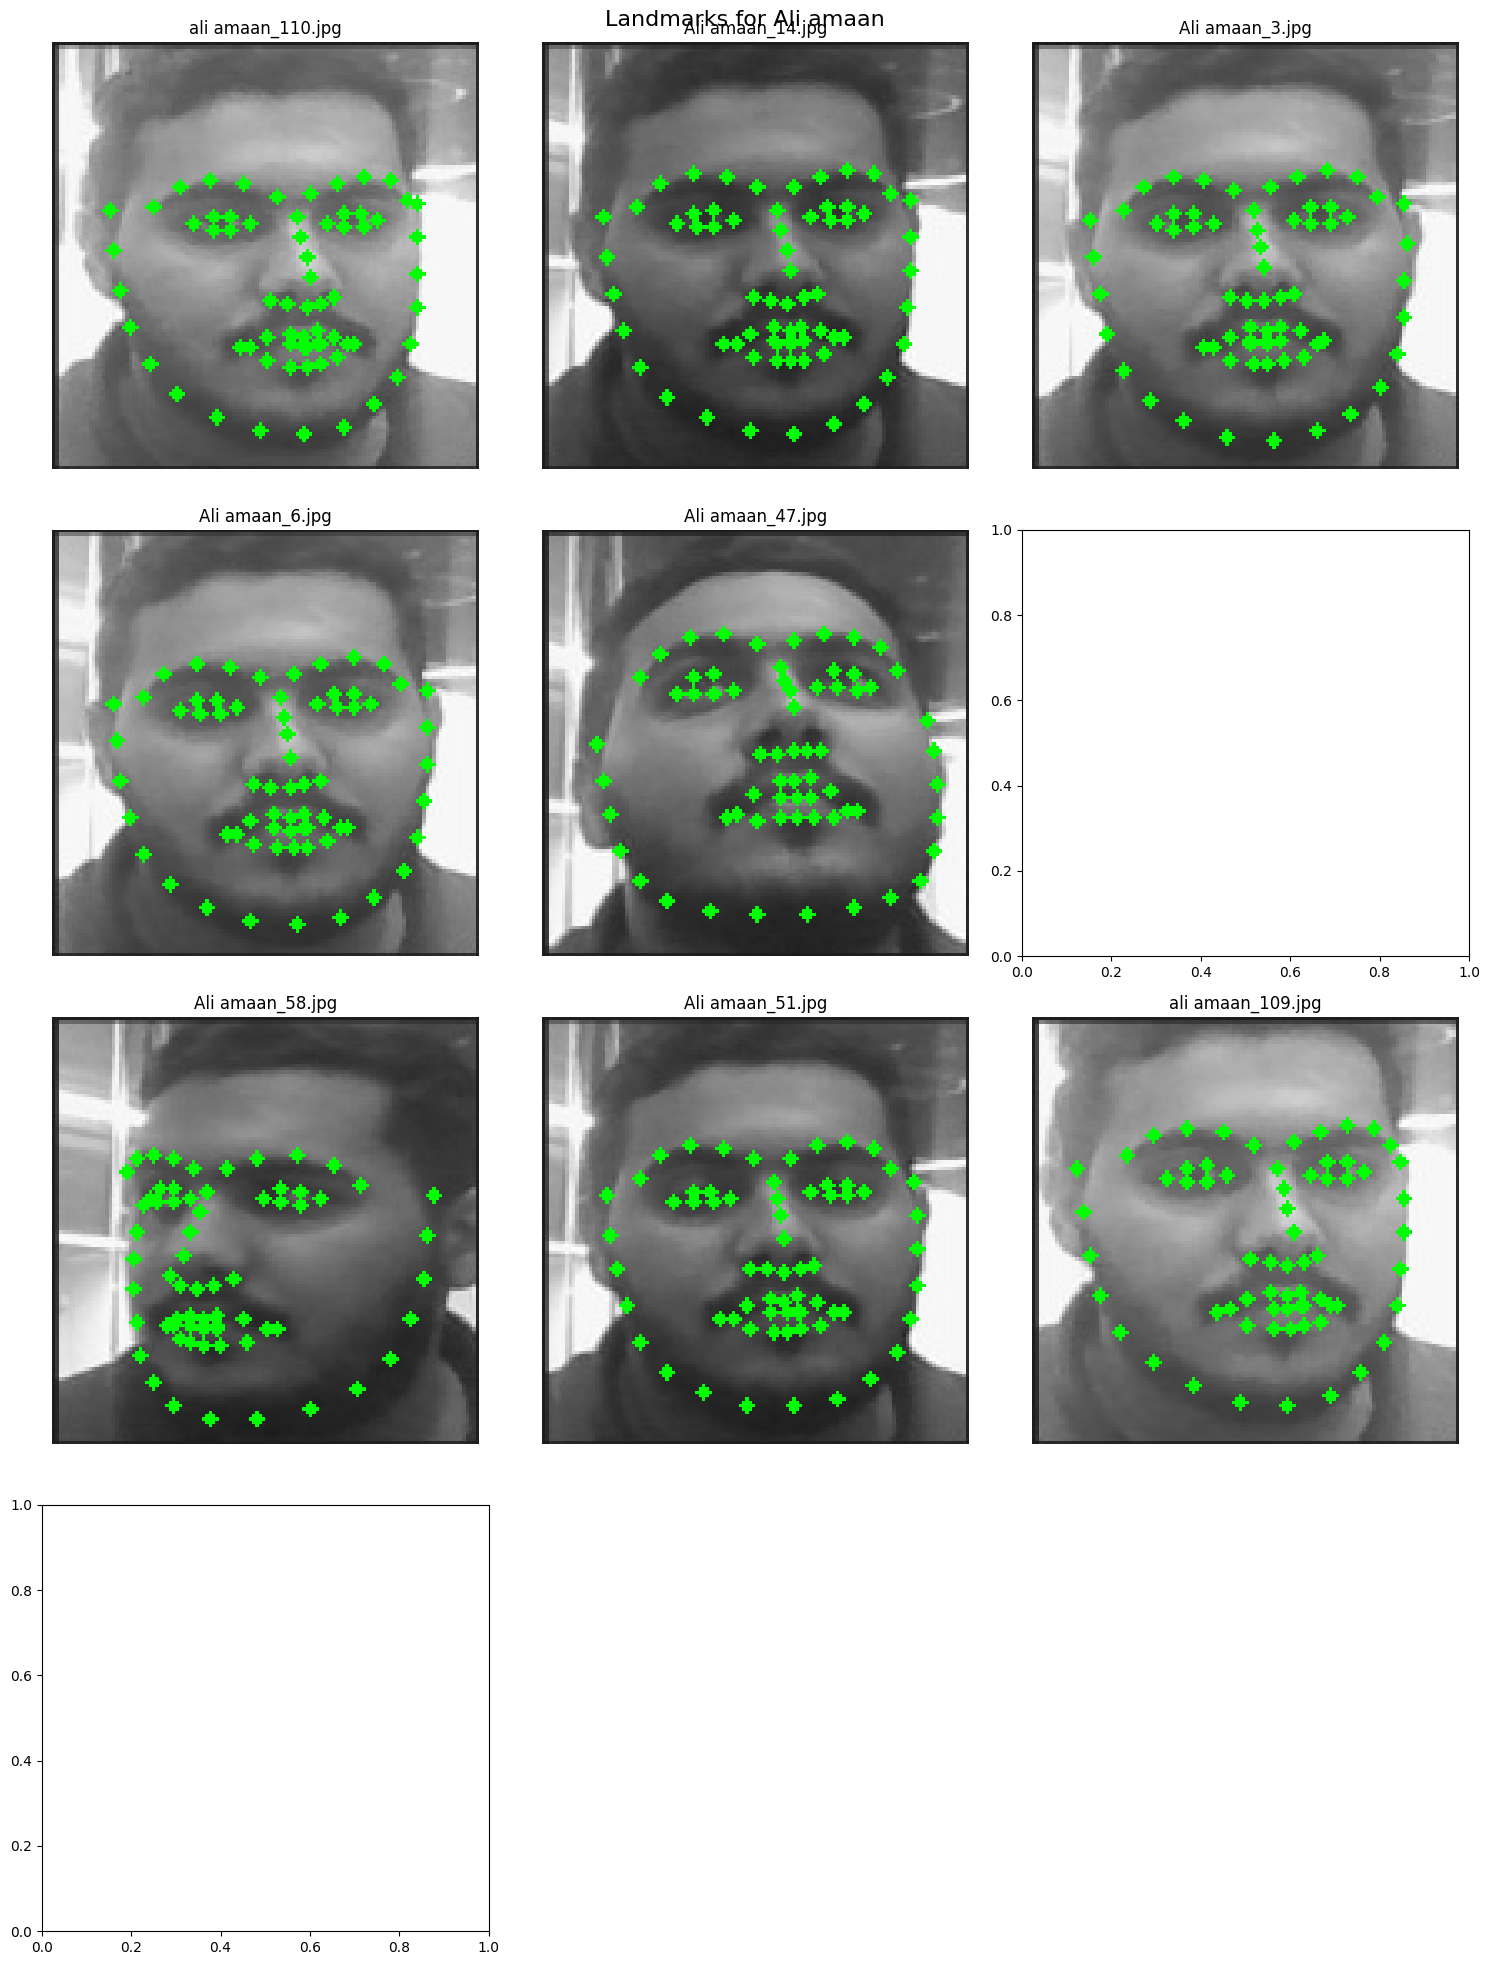

[WARNING] Landmarks file not found for dataset_not_for_upload_images\basit\basit_7.jpg


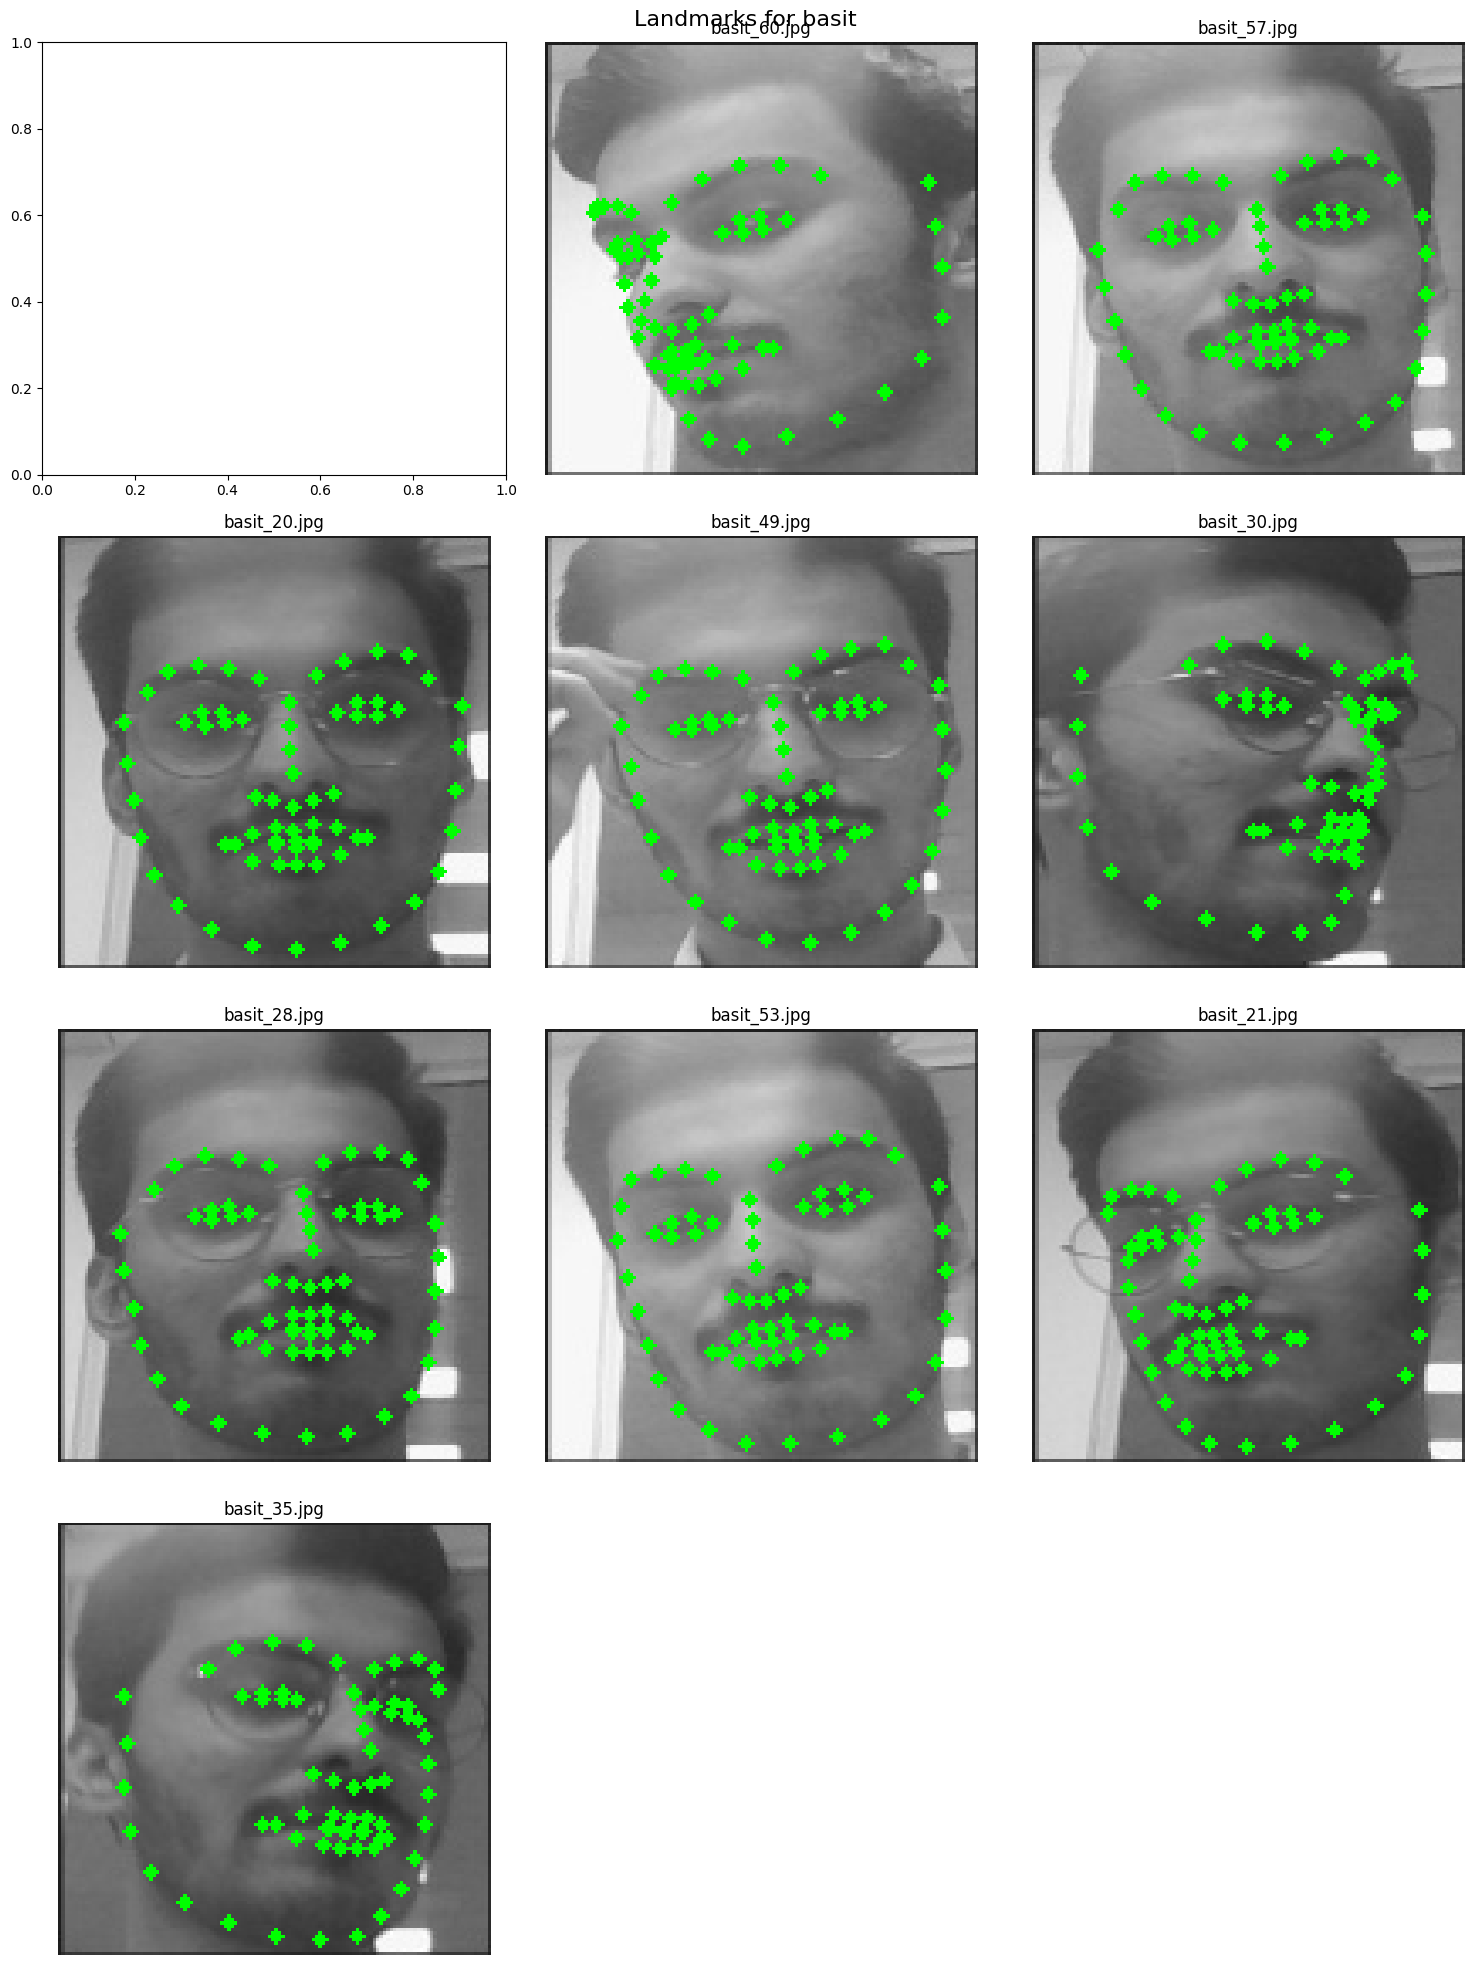

[WARNING] Landmarks file not found for dataset_not_for_upload_images\faizan\faizan_21.jpg


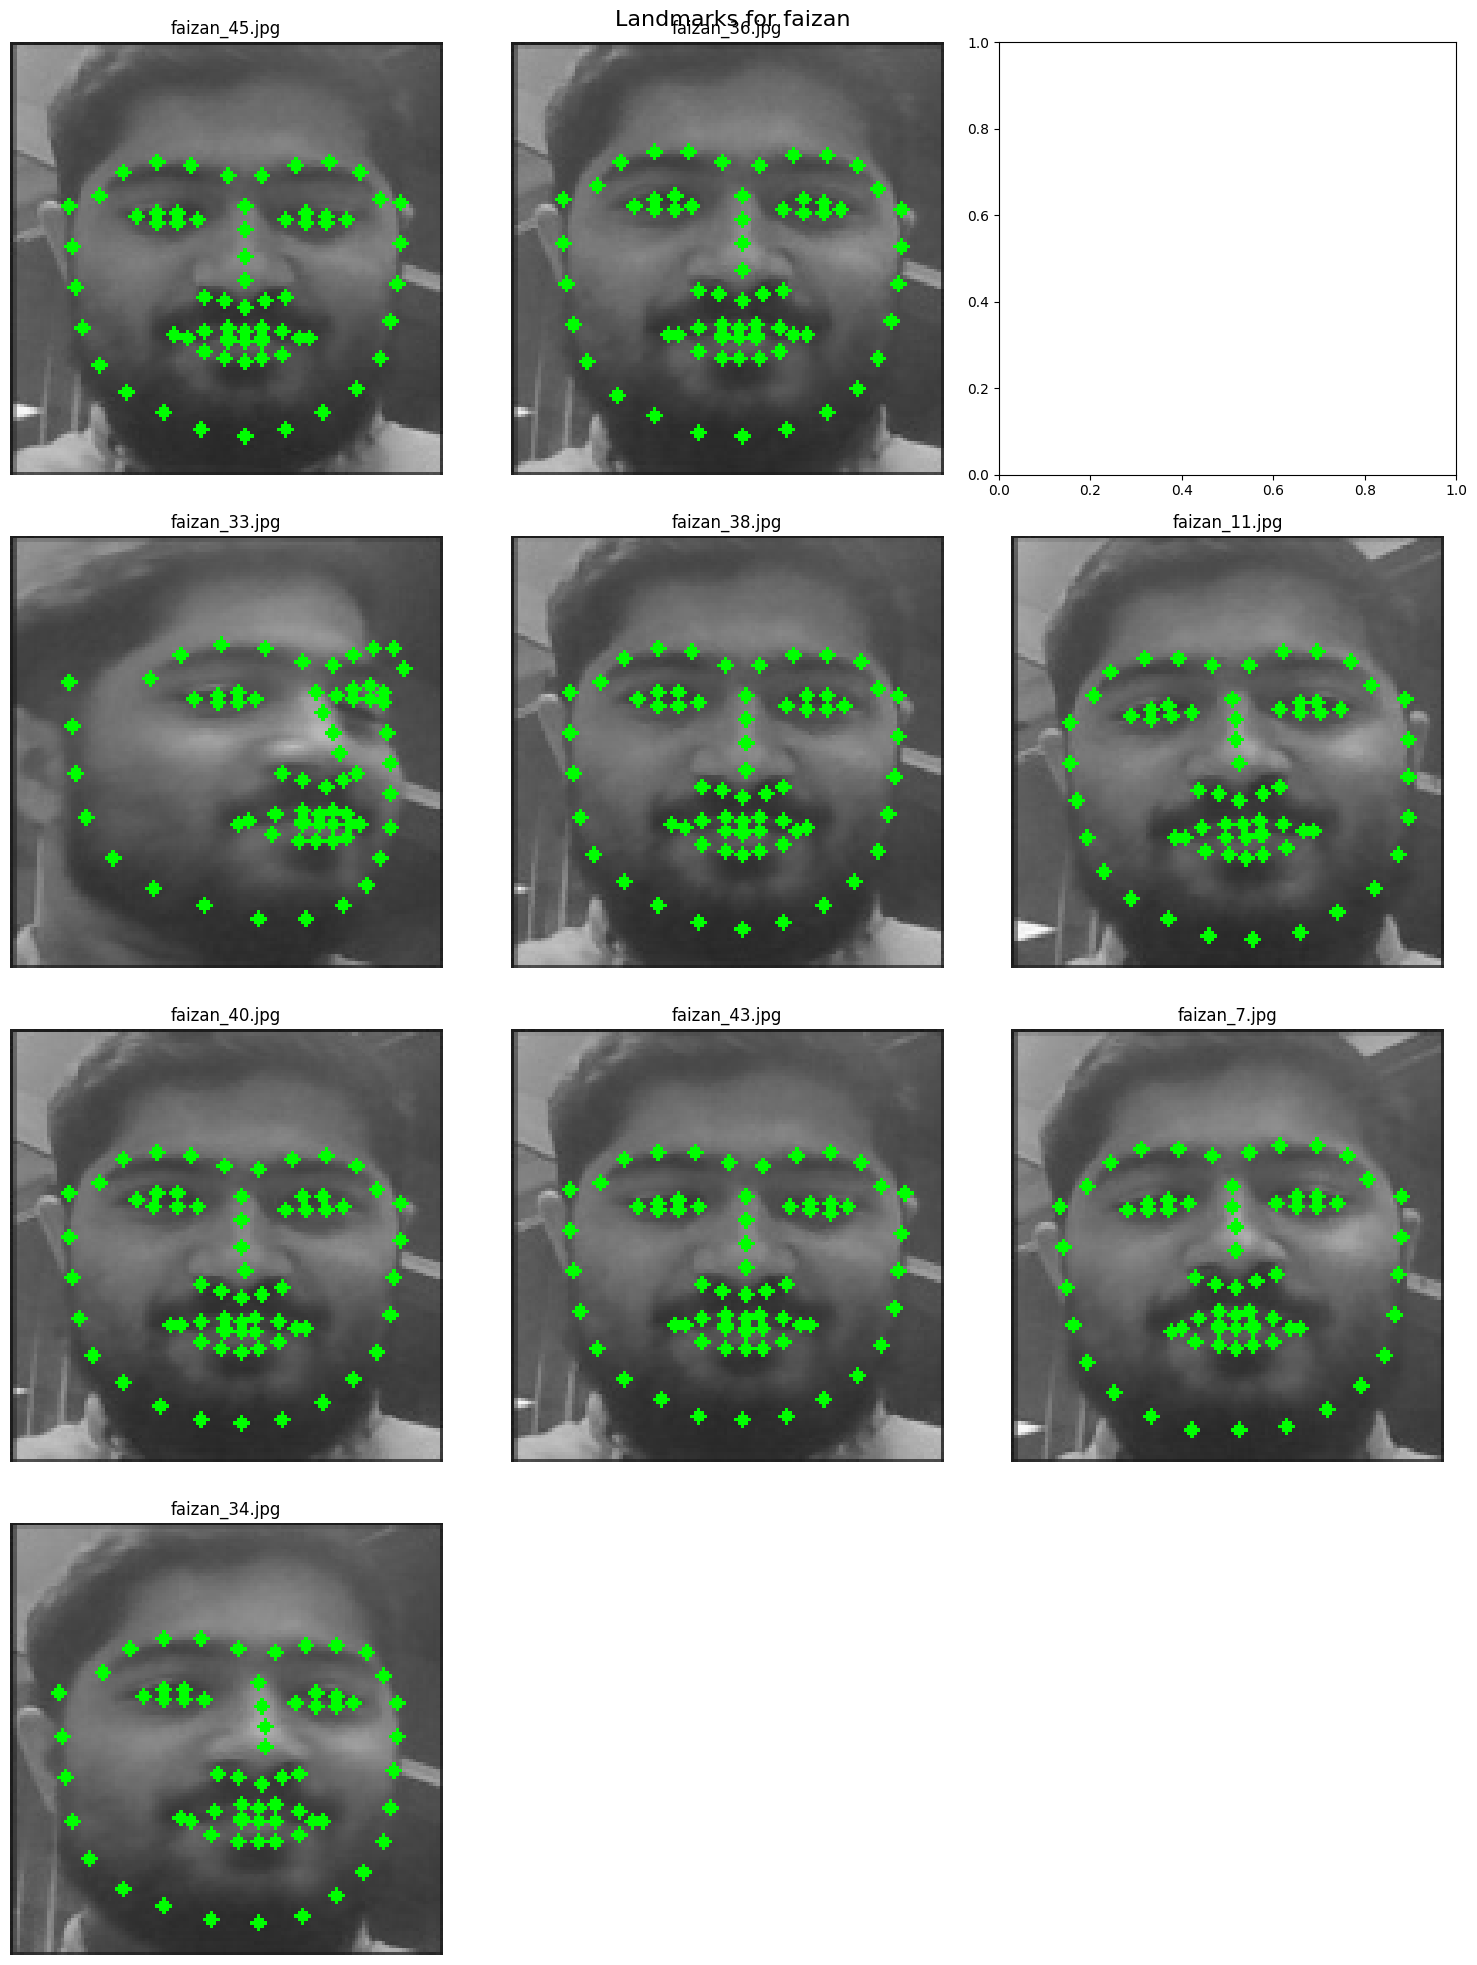

[WARNING] Landmarks file not found for dataset_not_for_upload_images\jahanzaib\jahanzaib_37.jpg
[WARNING] Landmarks file not found for dataset_not_for_upload_images\jahanzaib\jahanzaib_22.jpg
[WARNING] Landmarks file not found for dataset_not_for_upload_images\jahanzaib\jahanzaib_15.jpg
[WARNING] Landmarks file not found for dataset_not_for_upload_images\jahanzaib\jahanzaib_60.jpg


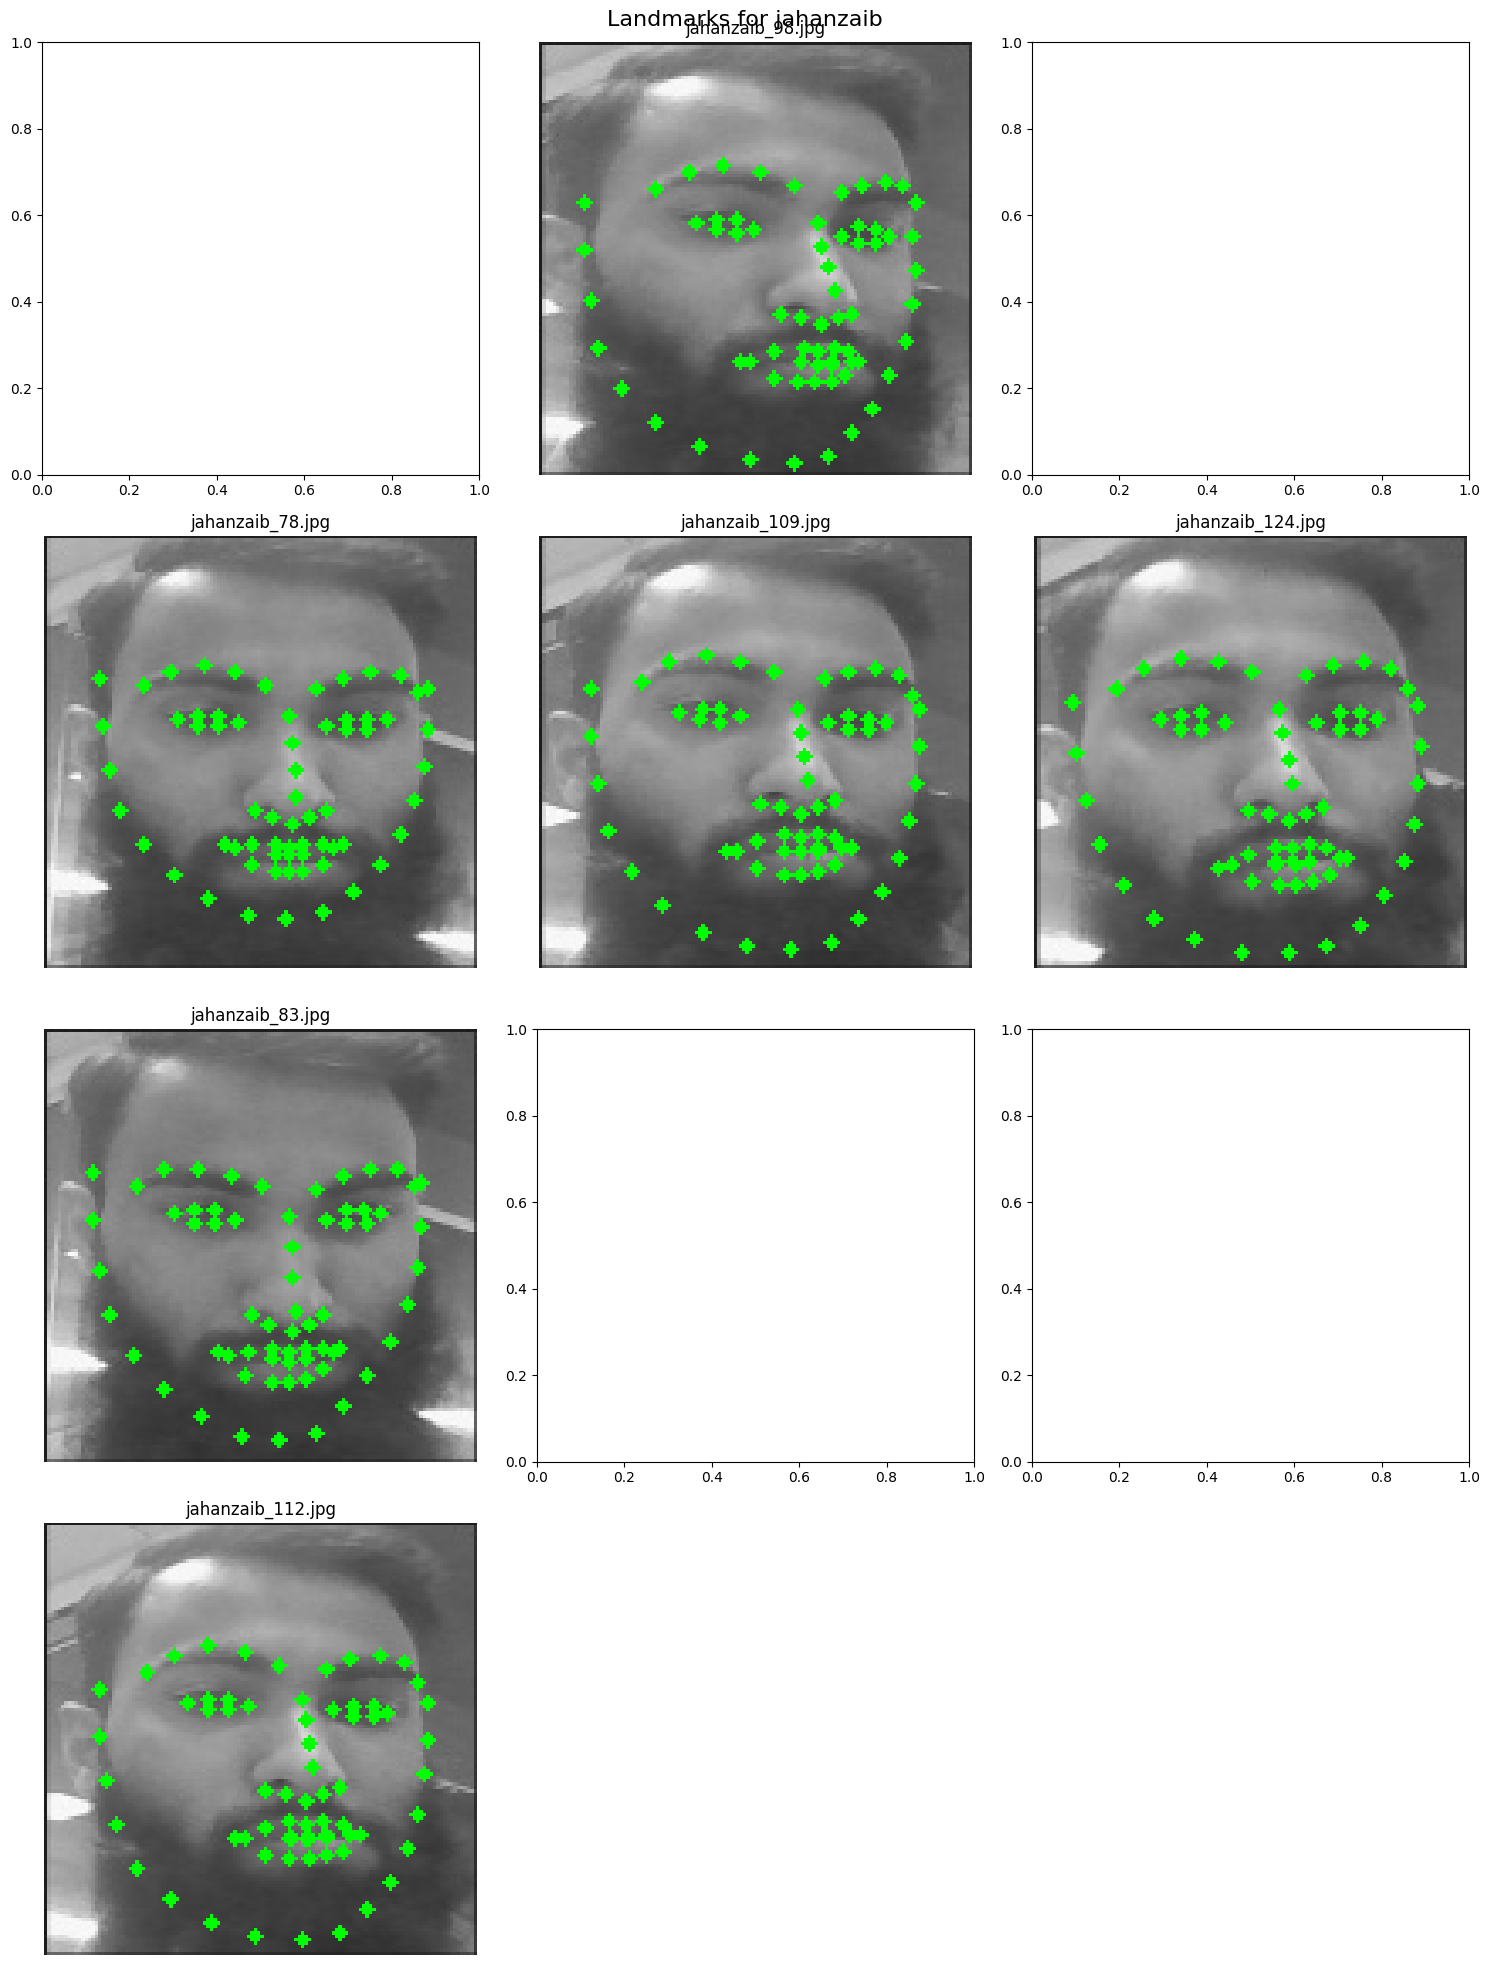

[WARNING] Landmarks file not found for dataset_not_for_upload_images\musaddiq\musaddiq_21.jpg
[WARNING] Landmarks file not found for dataset_not_for_upload_images\musaddiq\musaddiq_17.jpg


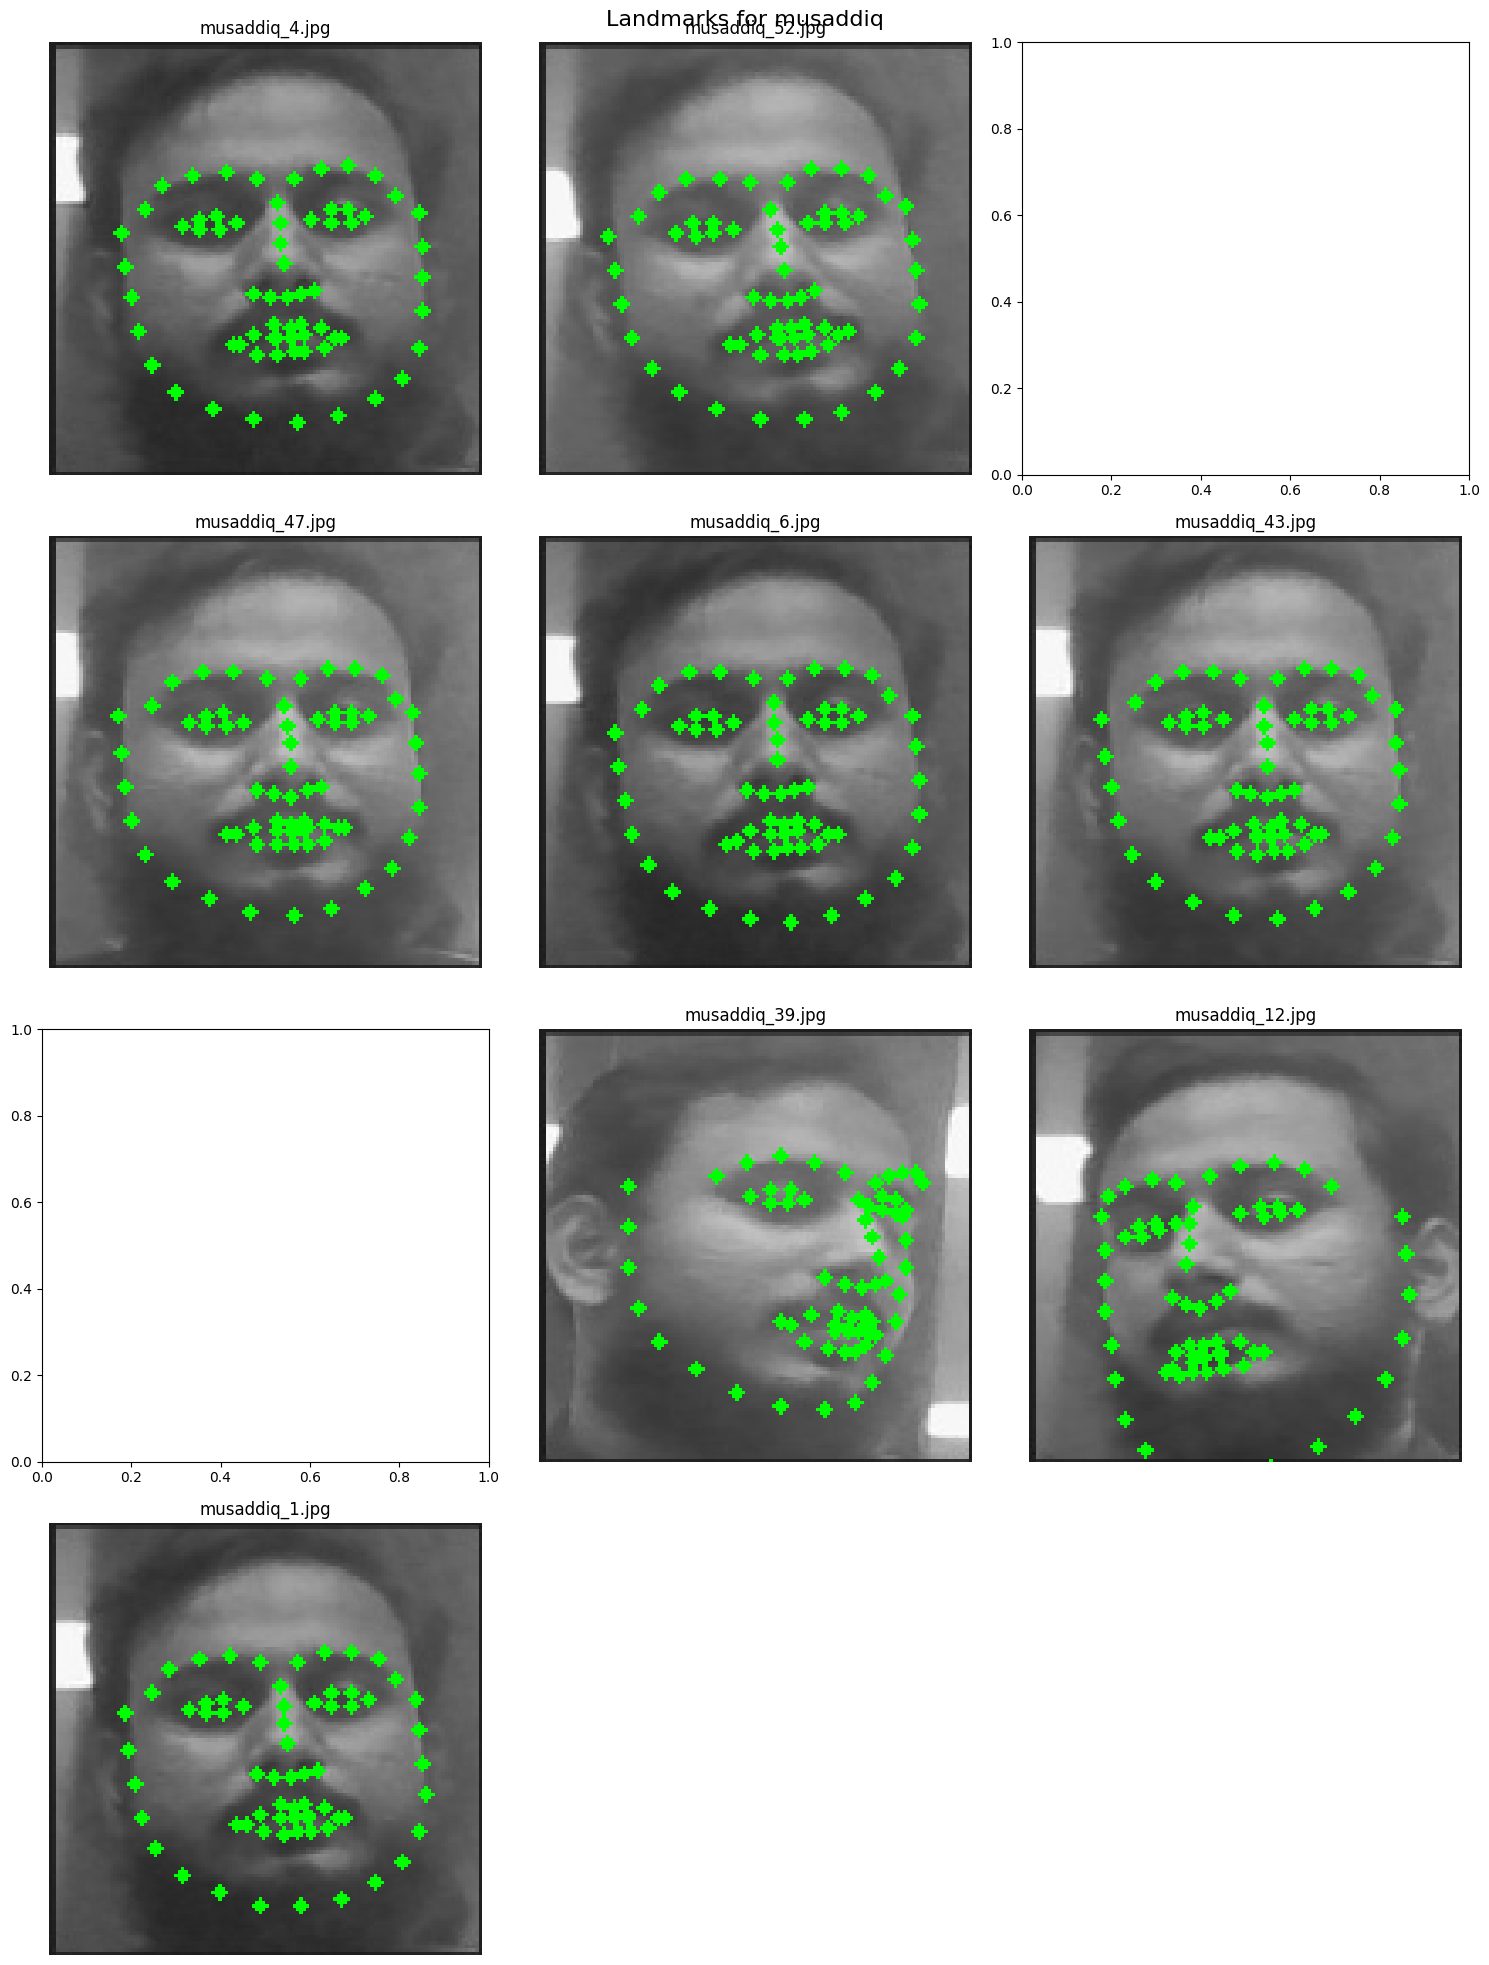

[WARNING] Landmarks file not found for dataset_not_for_upload_images\muzammil\muzammil_46.jpg
[WARNING] Landmarks file not found for dataset_not_for_upload_images\muzammil\muzammil_3.jpg
[WARNING] Landmarks file not found for dataset_not_for_upload_images\muzammil\muzammil_55.jpg


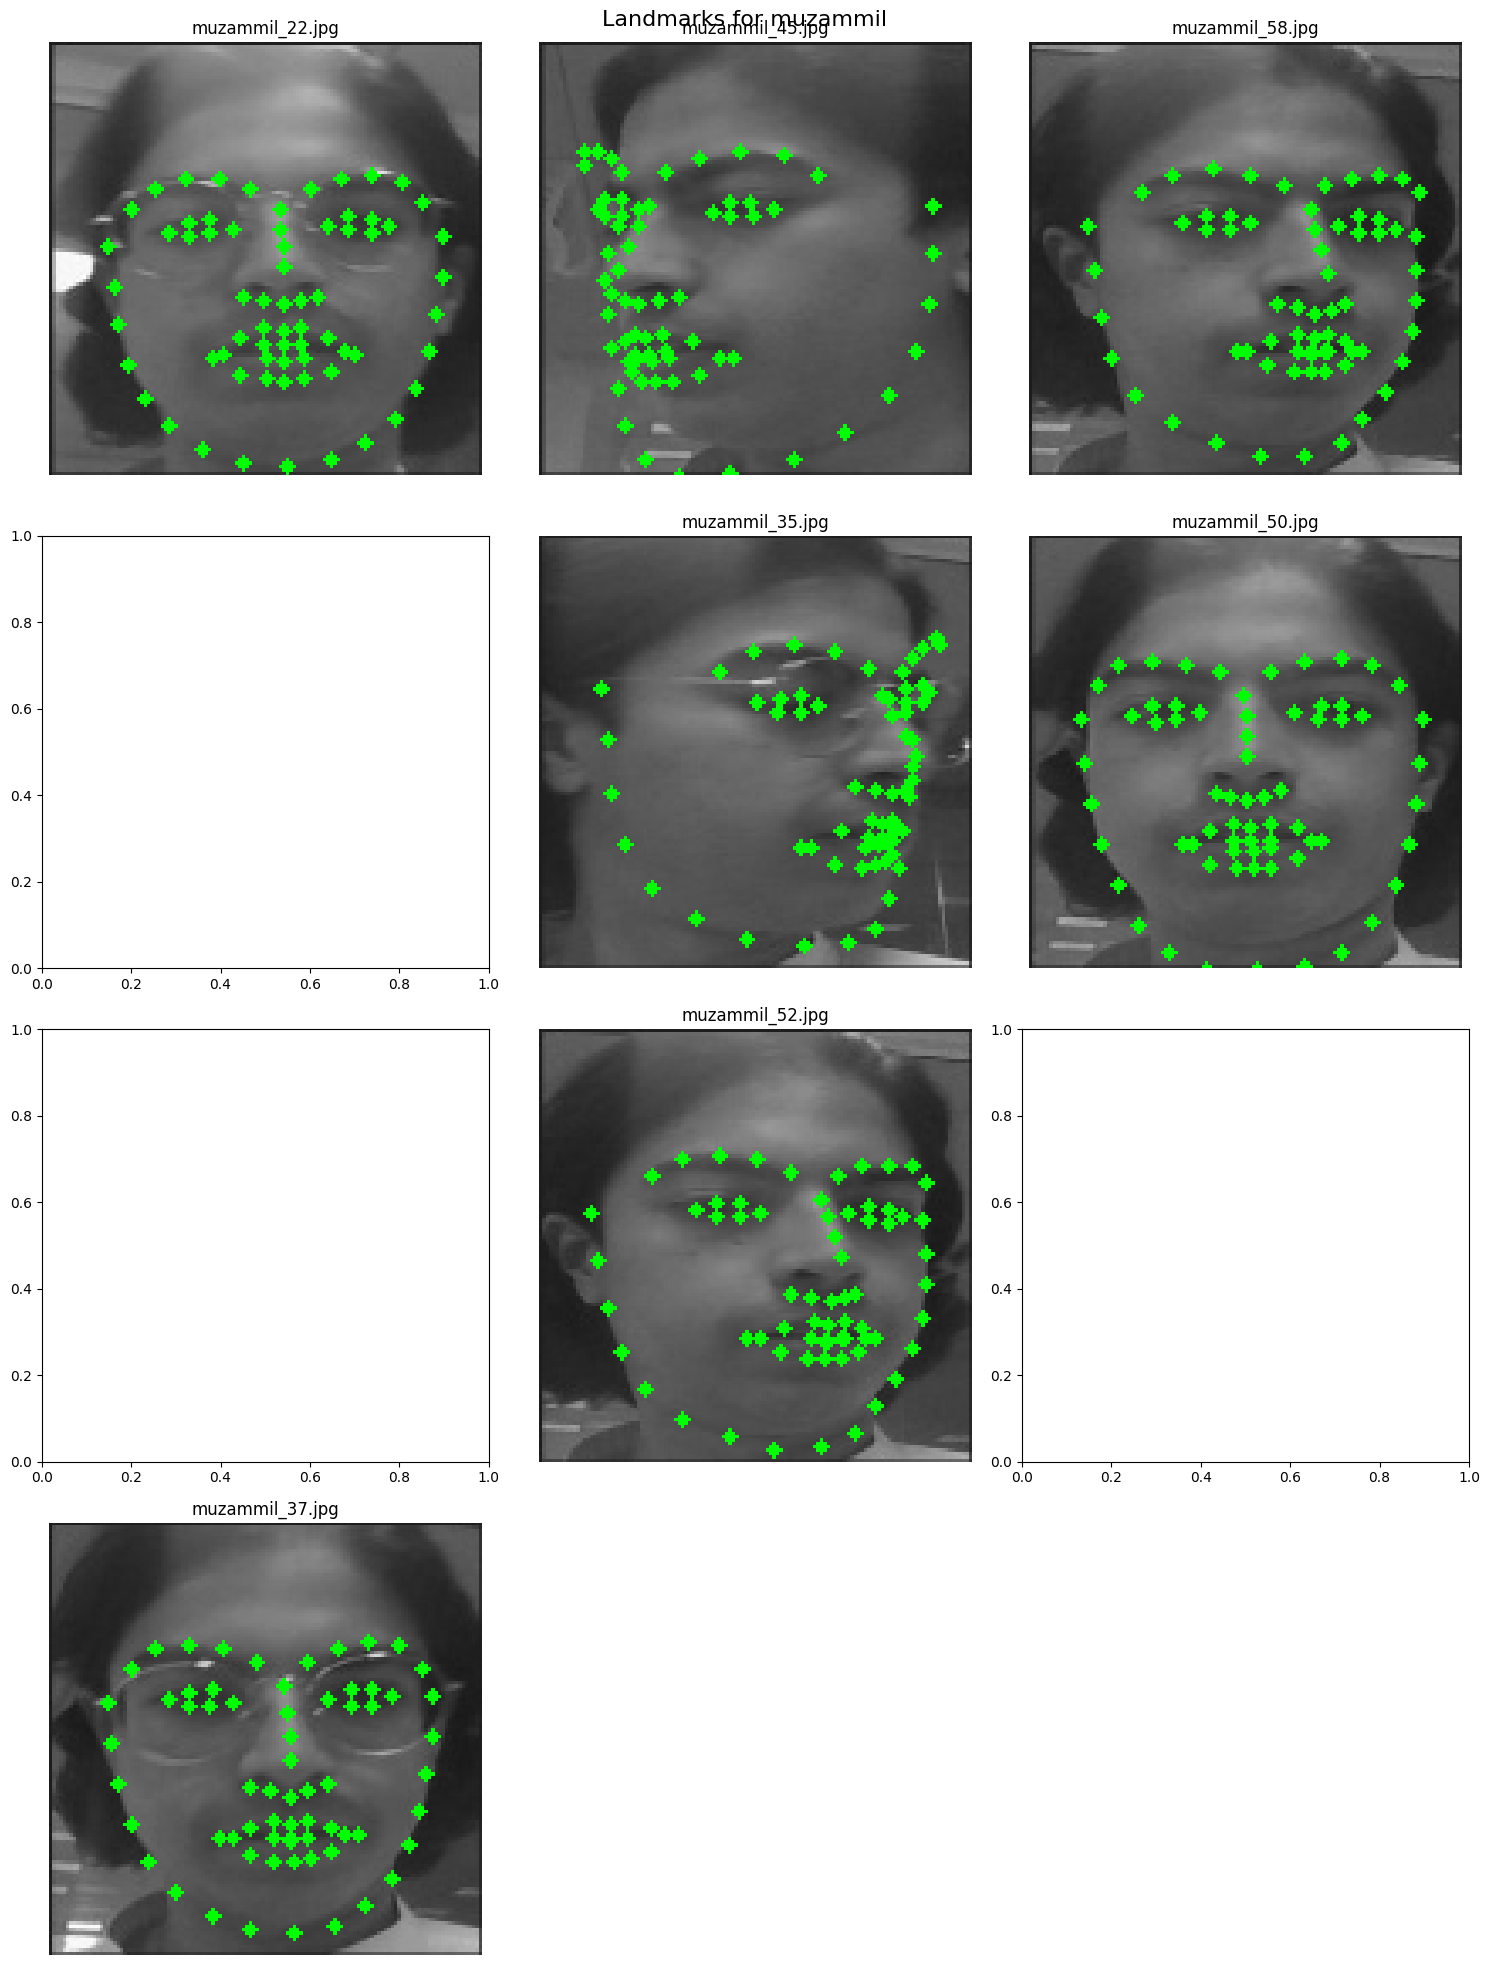

[WARNING] Landmarks file not found for dataset_not_for_upload_images\noman\noman_10.jpg
[WARNING] Landmarks file not found for dataset_not_for_upload_images\noman\noman_11.jpg
[WARNING] Landmarks file not found for dataset_not_for_upload_images\noman\noman_15.jpg
[WARNING] Landmarks file not found for dataset_not_for_upload_images\noman\noman_18.jpg
[WARNING] Landmarks file not found for dataset_not_for_upload_images\noman\noman_2.jpg
[WARNING] Landmarks file not found for dataset_not_for_upload_images\noman\noman_7.jpg
[WARNING] Landmarks file not found for dataset_not_for_upload_images\noman\noman_4.jpg


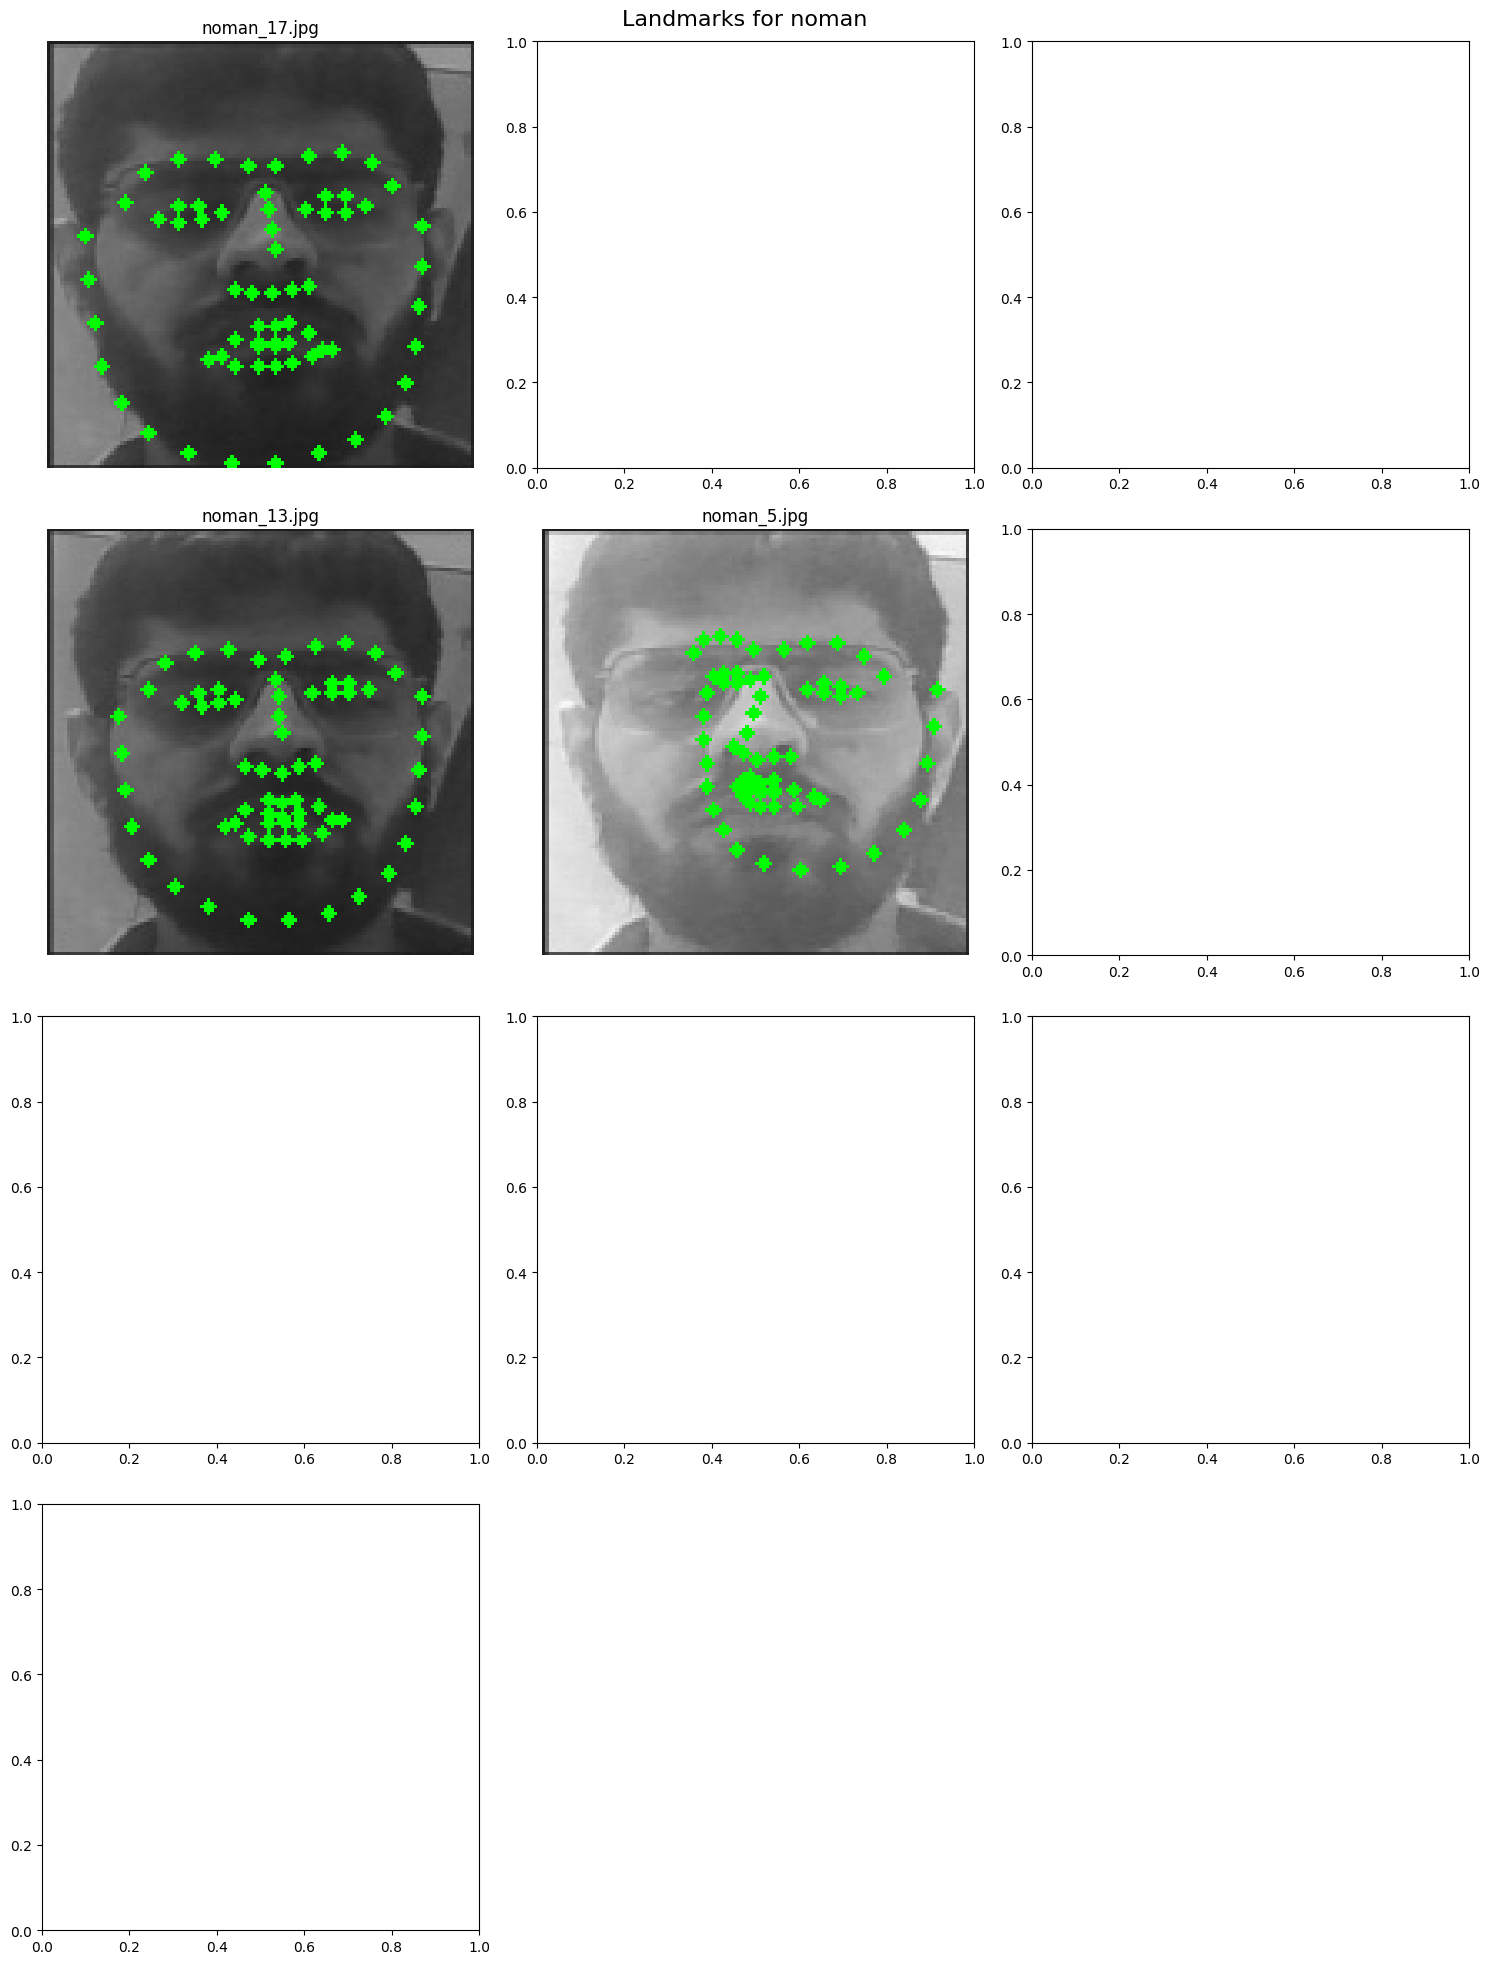

[WARNING] Landmarks file not found for dataset_not_for_upload_images\talal\talal_129.jpg
[WARNING] Landmarks file not found for dataset_not_for_upload_images\talal\talal_122.jpg
[WARNING] Landmarks file not found for dataset_not_for_upload_images\talal\talal_71.jpg
[WARNING] Landmarks file not found for dataset_not_for_upload_images\talal\talal_140.jpg
[WARNING] Landmarks file not found for dataset_not_for_upload_images\talal\talal_70.jpg


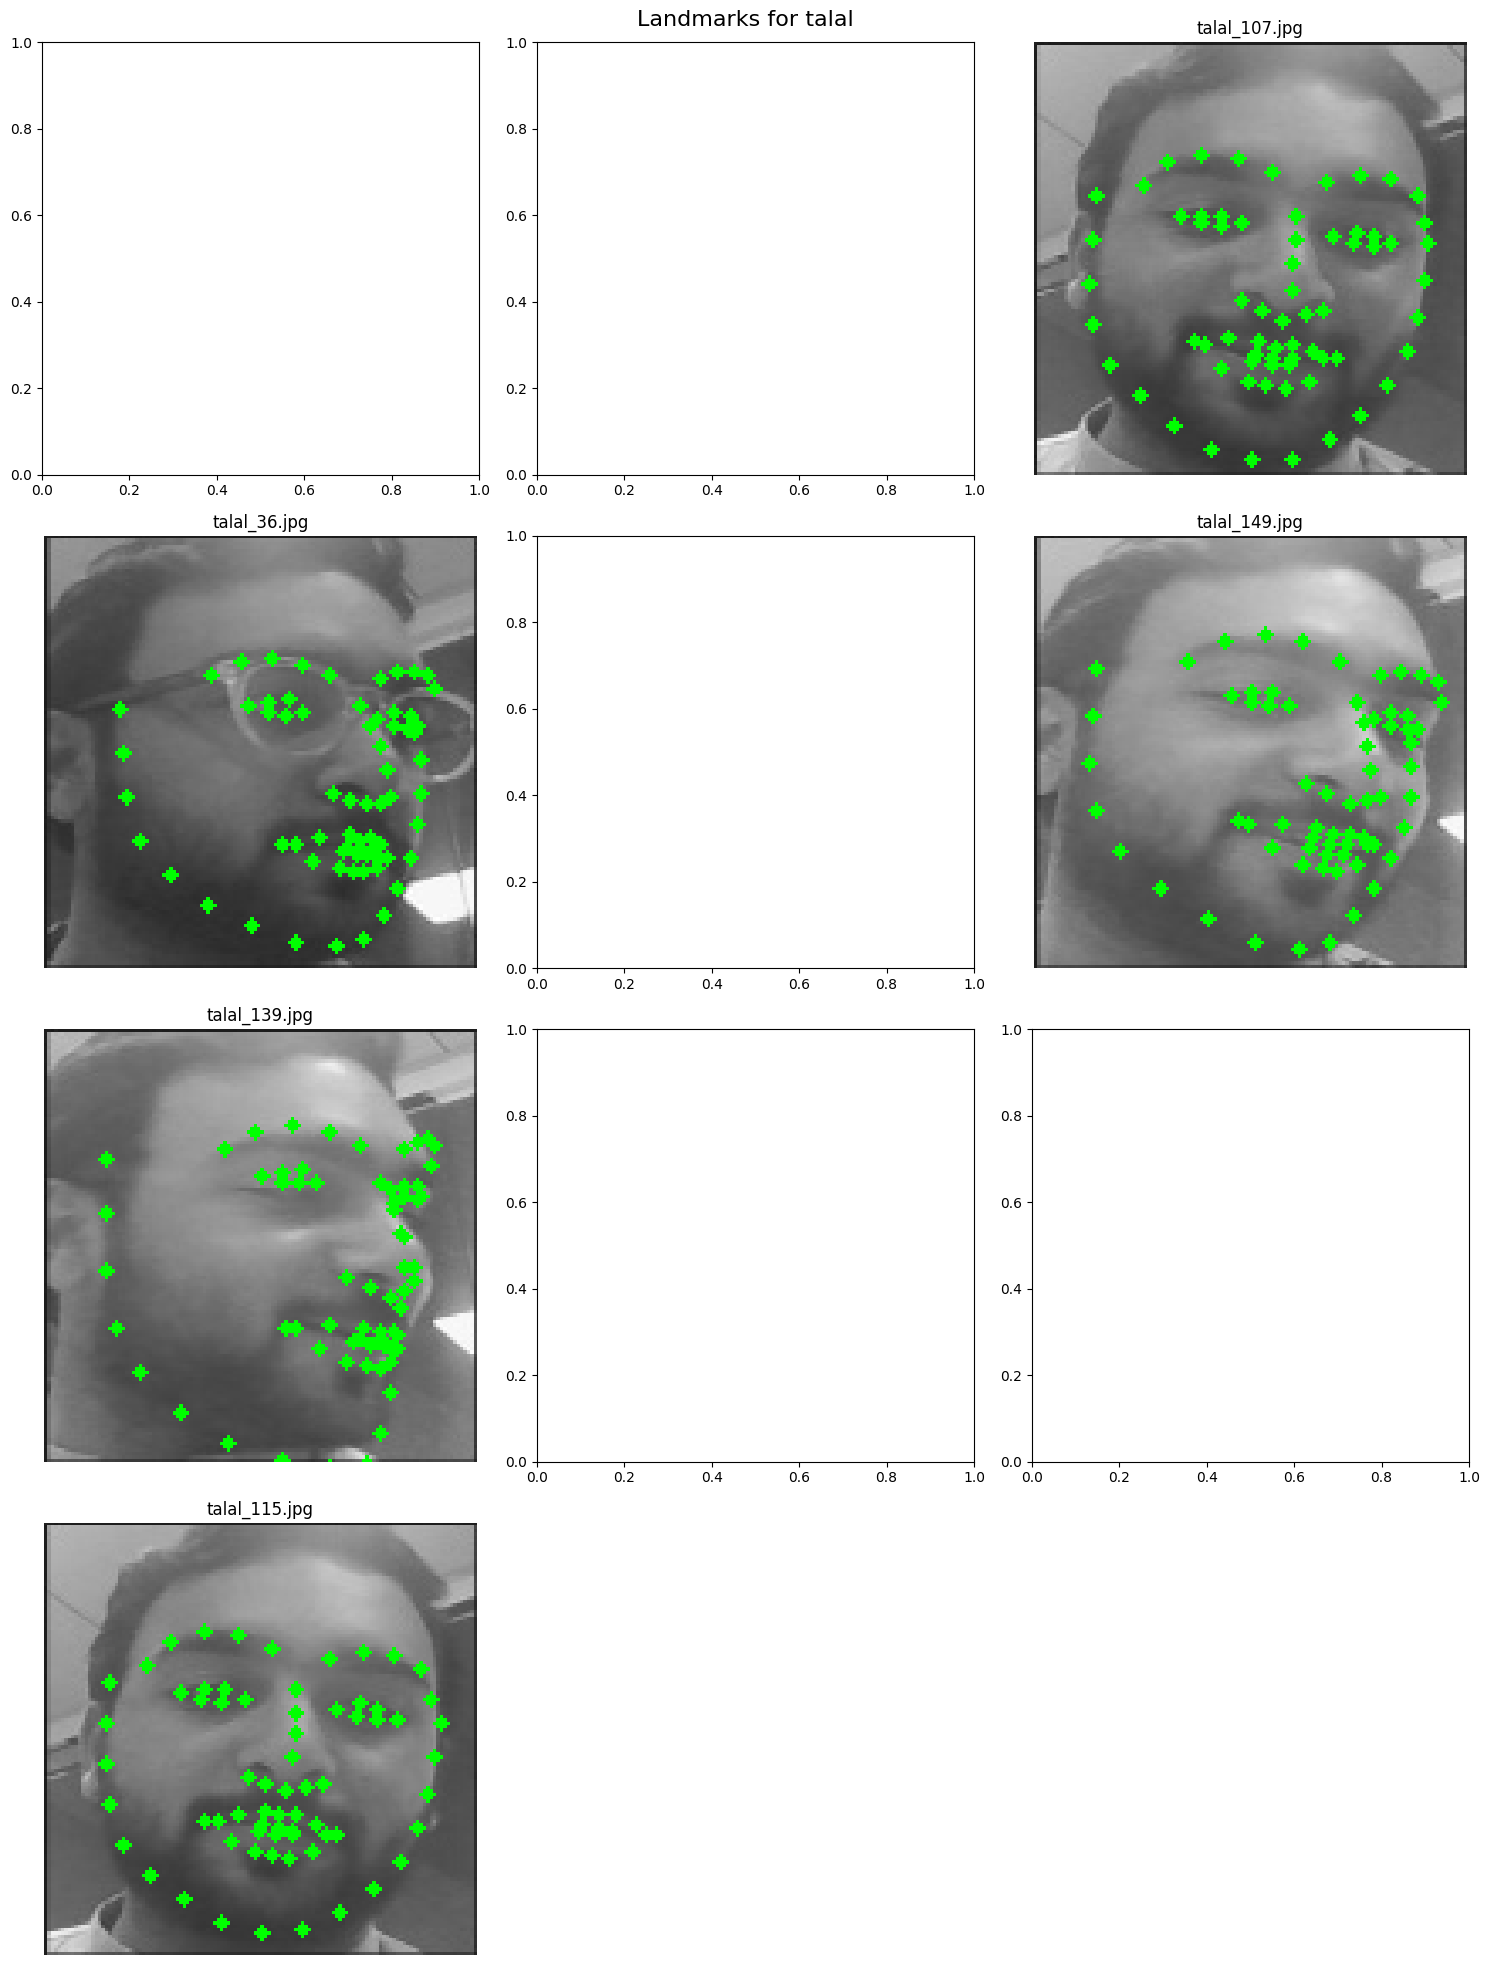

[WARNING] Landmarks file not found for dataset_not_for_upload_images\usaid\usaid_33.jpg
[WARNING] Landmarks file not found for dataset_not_for_upload_images\usaid\usaid_43.jpg
[WARNING] Landmarks file not found for dataset_not_for_upload_images\usaid\usaid_45.jpg
[WARNING] Landmarks file not found for dataset_not_for_upload_images\usaid\usaid_74.jpg
[WARNING] Landmarks file not found for dataset_not_for_upload_images\usaid\usaid_32.jpg


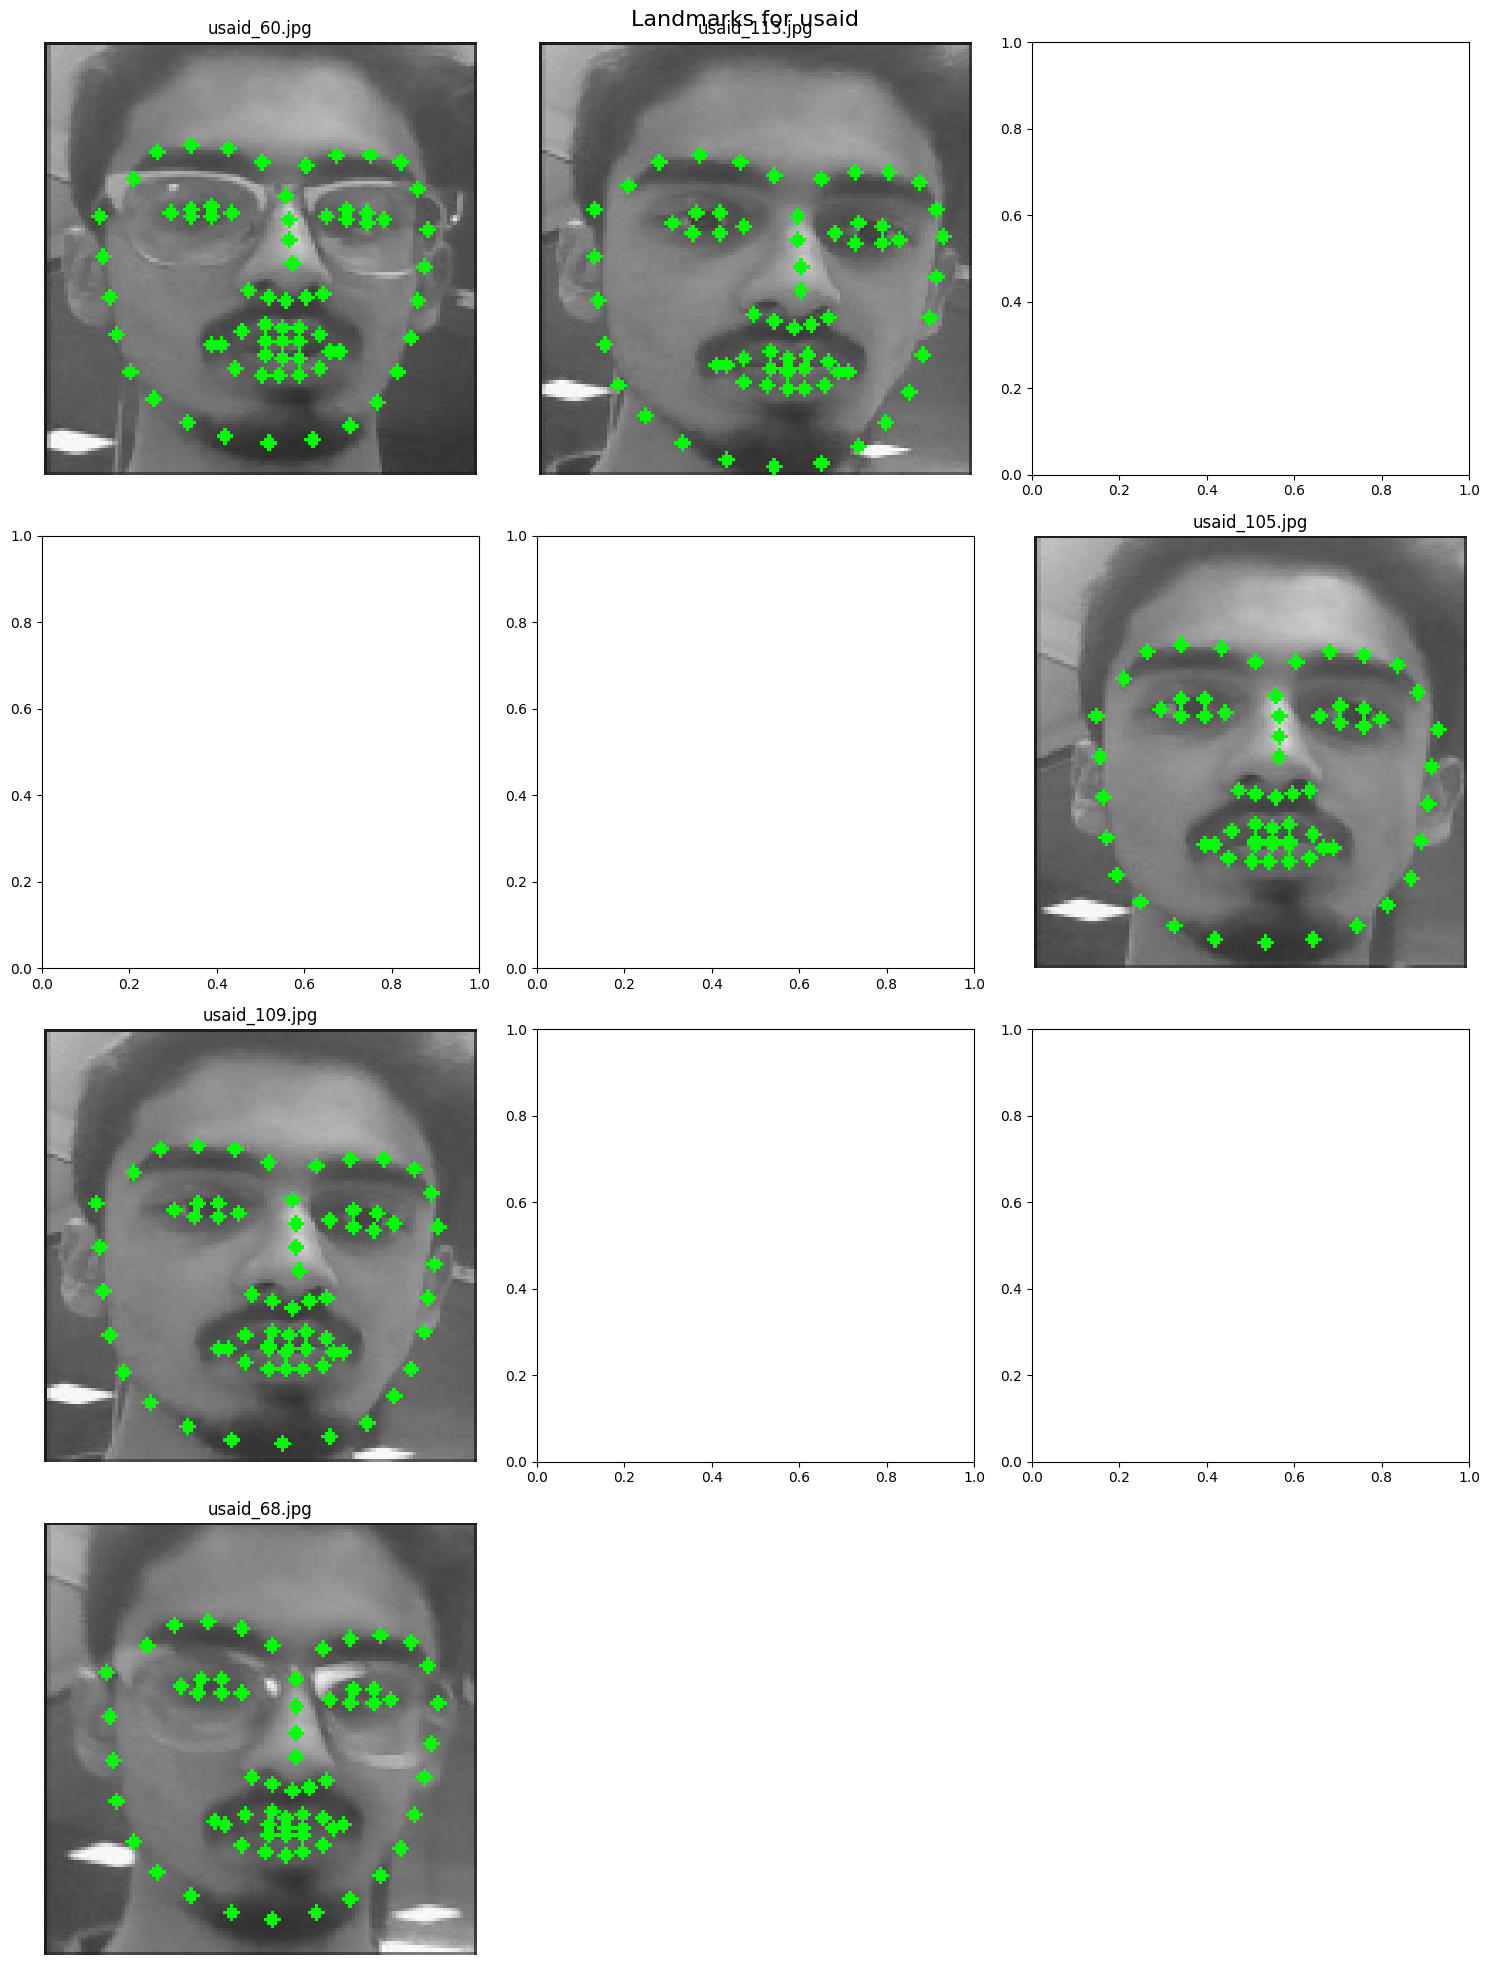

In [3]:
import os
import cv2
import numpy as np
from pathlib import Path
import random
from matplotlib import pyplot as plt

class LandmarkVisualize:
    def __init__(self, base_image_dir, landmarks_extension) -> None:
        self.base_image_dir = Path(base_image_dir)
        self.landmarks_extension = landmarks_extension
        all_names = os.listdir(base_image_dir)

        self.data_images_paths = self.set_data_paths(all_names, self.base_image_dir, ["*.jpg", "*.png"])
        print("image and landmarks added")

    def set_data_paths(self, all_names, initial_path, extensions: list = list) -> {}:
        data_paths = {}
        for name in all_names:
            new_path = initial_path.joinpath(name)
            paths = []
            for ext in extensions:
                paths += list(new_path.rglob(ext))
            data_paths[name] = paths
        return data_paths

    def visualize(self):
        for name in self.data_images_paths:
            images = self.data_images_paths[name]
            
            # Limit the number of images to 10
            if len(images) > 10:
                images = random.sample(images, 10)

            num_images = len(images)
            if num_images == 0:
                print(f"[WARNING] No images found for {name}.")
                continue

            # Define the grid size (rows x cols)
            cols = 3
            rows = (num_images + cols - 1) // cols  # Round up to ensure enough rows
            fig, axs = plt.subplots(rows, cols, figsize=(15, 5 * rows))

            for i, path in enumerate(images):
                # Derive the landmarks file path
                landmarks_path = self.get_landmark_path(path)

                # Check if the landmarks file exists
                if not landmarks_path.exists():
                    print(f"[WARNING] Landmarks file not found for {path}")
                    continue

                # Load the image
                image = cv2.imread(str(path))
                if image is None:
                    print(f"[ERROR] Unable to load image: {path}")
                    continue

                # Load the landmarks from .npy file
                landmarks = np.load(landmarks_path)

                # Plot landmarks on the image
                for landmark in landmarks:
                    for (x, y) in landmark:
                        cv2.circle(image, (x, y), 2, (0, 255, 0), -1)

                # Determine subplot position (row, col)
                row = i // cols
                col = i % cols

                # Display the image with landmarks in the subplot
                axs[row, col].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
                axs[row, col].set_title(f"{path.name}")
                axs[row, col].axis('off')

            # Hide any unused subplots
            for j in range(i + 1, rows * cols):
                fig.delaxes(axs[j // cols, j % cols])

            # Set the title for the user's set of images
            plt.suptitle(f"Landmarks for {name}", fontsize=16)
            plt.tight_layout()
            plt.show()

    def get_landmark_path(self, path):
        landmarks_path = Path(str(path)[:-4] + self.landmarks_extension)
        return landmarks_path

# Example usage:
LandmarkVisualize("./dataset_not_for_upload_images", "_landmarks.npy").visualize()
